# Bonus Quest

**Difficulty:** A

**Description:** Students are in a tough spot after changing the grading formula for assignments and now fear taking the exam without a 3.5 GPA. The system gives players a chance to raise their score by completing this bonus quest. This is your Solo Leveling. Survive at all costs. Good luck!

**Goal:** Complete the bonus assignment created by Andrei and corrected by Max.

**Deliverables:**
- Jupyter Notebook (ipynb) file with solution and all cell outputs
- CSV file with model predictions
- Both files uploaded to GitHub repository

**Reward:**
- Bonus points for the Assignment part.
- Title “The one who overcomes the difficulties of fate.”
- +1000 EXP in mastering sklearn
- Skill Upgrade «ML Engineering Lv.2»
- Special Item: [???]

---

## Problem Statement

As a dataset, use Russian news from Balto-Slavic Natural Language Processing 2019 (helsinki.fi). Entities of interest: PER, ORG, LOC, EVT, PRO (see Guidelines_20190122.pdf (helsinki.fi)).

It is sufficient to use 9 documents about Brexit from the sample provided by the organizers.

## Approach

This assignment combines traditional ML methods (using scikit-learn) with modern LLM-based approaches (DeepSeek) for comparison. You will:
1. Formulate the problem as a machine learning task
2. Prepare features and split data appropriately
3. Train and compare multiple models using scikit-learn
4. Evaluate models using proper train/test splits
5. Compare ML model performance with DeepSeek responses
6. Analyze results in terms of course concepts (bias-variance tradeoff, overfitting, generalization)


Example of one document:

ru-10

ru

2018-09-20

https://rg.ru/2018/09/20/tereza-mej-rasschityvaet-usidet-v-sedle-do-zaversheniia-procedury-brexit.html

Theresa May expects to stay in the saddle until the completion of the Brexit procedure
However, according to British media reports, at the upcoming Conservative Party conference at the end of September, May's opponents will give her a serious fight, from which it is not certain that she will emerge victorious. The bookmakers' favorite as a possible replacement for the current prime minister, former British Foreign Secretary Boris Johnson intends to deliver an alternative report that will leave no stone unturned from the government's views on the conditions of "Brexit". From Johnson's point of view, "London has wrapped the British constitution in a suicide belt and handed the detonator to Michel Barnier (Brussels' chief Brexit negotiator. - Ed.)". It is with this metaphor that the head of the British government will have to fight at the conference.


### Task 1
**Problem Formulation & ML Perspective**

Describe the task from both NLP and ML perspectives:
- What kind of machine learning problem is this? (classification, sequence labeling, etc.)
- How can this be formulated as a supervised learning problem?
- What classical ML methods exist for solving it? (e.g., logistic regression, naive Bayes, SVM with text features)
- How can it be solved using modern LLMs like DeepSeek?
- What are the assumptions of different model classes? (e.g., linear models vs. more complex approaches)
- How is model quality typically evaluated in this task? What metrics are appropriate and why?

### Задание 1
**Формулировка проблемы и подход к ML**

Опишите задачу как с точки зрения NLP, так и с точки зрения ML:
- Что это за проблема машинного обучения? (классификация, маркировка последовательности и т.д.)
- Как это можно сформулировать как проблему обучения под наблюдением?
- Какие классические методы ML существуют для ее решения? (например, логистическая регрессия, наивный байесовский подход, SVM с текстовыми функциями)
- Как это можно решить с помощью современных LLM, таких как DeepSeek?
- Каковы предположения различных классов моделей? (например, линейные модели в сравнении с более сложными подходами)
- Как обычно оценивается качество модели в этой задаче? Какие показатели являются подходящими и почему?


С точки зрения NLP, задача представляет собой распознавание именованных сущностей, где необходимо идентифицировать и классифицировать ключевые элементы текста (персоны, организации и т.д.). В машинном обучении это задача последовательностной классификации (sequence labeling), где каждому токену в предложении присваивается метка из конечного множества (B-PER, I-ORG, O и др.). Формулировка как задачи обучения с учителем требует размеченных данных, где для каждого токена известна его истинная метка. На основе этих данных модель обучается предсказывать метки для новых текстов.

Классические методы ML для решения включают:
1. Модели на основе признаков: Логистическая регрессия, метод опорных векторов (SVM), наивный Байес — они используют ручно созданные признаки токенов (часть речи, регистр, контекстные слова и др.).
2. Условные случайные поля (CRF) — специализированный метод для последовательностного анализа, учитывающий зависимости между соседними метками.
3. Ансамбли (Random Forest, Gradient Boosting) на векторизованных признаках текста.

Современные LLM (DeepSeek) решают задачу через генеративный или классификационный подход по промптам, используя внутренние контекстуальные представления, обученные на огромных корпусах. В отличие от классических моделей, LLM не требуют явного инжиниринга признаков и могут учитывать сложные семантические связи.

Предположения моделей:
- Линейные модели (логистическая регрессия) предполагают линейную зависимость между признаками и метками.
- CRF учитывают марковские свойства последовательности.
- LLM исходят из того, что языковые закономерности, усвоенные при предобучении, переносимы на конкретную задачу.

Основные метрики оценки качества:
- Precision, Recall, F1-score — F1-мера наиболее информативна, так как балансирует точность и полноту.
- Accuracy может вводить в заблуждение из-за дисбаланса классов (большинство токенов — «O»).
- Поэлементное сравнение с эталоном на тестовой выборке, разделённой с сохранением последовательной структуры текстов. Кросс-валидация здесь применяется с осторожностью, чтобы не разрывать контекст предложений.

### Task 2
**Data Loading & Preparation**

Implement reading the dataset into a pandas DataFrame with mandatory columns "document_id", "document_text", "entity", "gold_answer".

Then prepare the data for ML:
- Create features from text (e.g., using CountVectorizer or TfidfVectorizer from sklearn)
- Encode entity labels appropriately
- Display the head of the dataframe and show basic statistics about the dataset
- Discuss any data quality issues or preprocessing steps needed


### Задача 2
**Загрузка и подготовка данных**

Реализовать чтение набора данных в pandas DataFrame с обязательными столбцами "document_id", "document_text", "entity", "gold_answer".

Затем подготовить данные для ML:
- Создавать объекты из текста (например, с помощью CountVectorizer или TfidfVectorizer из sklearn)
- Соответствующим образом кодировать метки объектов
- Отображать заголовок фрейма данных и основную статистику о наборе данных
- Обсудите любые проблемы с качеством данных или необходимые этапы предварительной обработки

In [395]:
import pandas as pd
import re
from pathlib import Path
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [396]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [397]:
texts_dir = Path("/content/drive/MyDrive/training_pl_cs_ru_bg_rc1/raw/ru") # загрузила нужные папки с сайта
anns_dir = Path("/content/drive/MyDrive/training_pl_cs_ru_bg_rc1/annotated/ru")

In [398]:
all_records = []

In [399]:
txt_files = list(texts_dir.glob("brexit_ru.txt_file_*.txt"))
ann_files = list(anns_dir.glob("brexit_ru.txt_file_*.out"))

In [400]:
file_numbers = []
for f in txt_files:
    match = re.search(r'file_(\d+)\.txt$', f.name)
    if match:
        file_numbers.append(match.group(1))

file_numbers = sorted(file_numbers)[:9]

In [401]:
print(file_numbers )

['10', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1008']


In [402]:
for num in file_numbers:
    txt_file = texts_dir / f"brexit_ru.txt_file_{num}.txt"
    ann_file = anns_dir / f"brexit_ru.txt_file_{num}.out"

    if not txt_file.exists() or not ann_file.exists():
        continue

    txt_content = txt_file.read_text(encoding='utf-8')
    ann_content = ann_file.read_text(encoding='utf-8')

    lines = txt_content.split('\n')

    text_lines = []
    skip_lines = 0

    for i, line in enumerate(lines):
        if line.strip() == f"ru-{num}":
            skip_lines = i + 6
        elif i >= skip_lines and line.strip():
            text_lines.append(line)

    doc_text = '\n'.join(text_lines).strip()
    doc_id = f"ru-{num}"

    anns = []
    lines = ann_content.split('\n')
    for line in lines:
        line = line.strip()
        if line and '\t' in line:
            parts = line.split('\t')
            if len(parts) >= 4:
                anns.append({
                    'surface': parts[0],
                    'entity': parts[2]
                })

    for ann in anns:
        all_records.append({
            'document_id': doc_id,
            'document_text': doc_text,
            'entity': ann['entity'],
            'gold_answer': ann['surface']
        })

In [403]:
df = pd.DataFrame(all_records)
df.to_csv('brexit_documents.csv', index=False, encoding='utf-8')

In [404]:
df.head(10)

,document_id,document_text,entity,gold_answer
0,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,Brexit
1,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Альбиона
2,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Альбионе
3,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",PER,Борис Джонсон
4,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Британии
5,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Британия
6,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Брюсселе
7,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Брюсселем
8,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Брюссель
9,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",LOC,Брюсселю


In [405]:
print(df.shape)

(152, 4)


Подготовим данные для ML, очистим текст, как делали это во втором ДЗ:

In [406]:
def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower().strip()
    text = re.sub(r'\s+', ' ', text)
    return text

df['processed_answer'] = df['gold_answer'].apply(preprocess_text)

In [407]:
count_vectorizer = CountVectorizer(
    max_features=100,
    stop_words=['и', 'в', 'на', 'с', 'по', 'о', 'для'] # стоп слова на русском
)


X_count = count_vectorizer.fit_transform(df['processed_answer'])

In [408]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=100,
    ngram_range=(1, 2),
    stop_words=['и', 'в', 'на', 'с', 'по', 'о', 'для']
)

X_tfidf = tfidf_vectorizer.fit_transform(df['processed_answer'])

In [409]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['entity'])

In [410]:
df['entity_length'] = df['gold_answer'].str.len()
df['word_count'] = df['gold_answer'].str.split().str.len()
df['is_capitalized'] = df['gold_answer'].str[0].str.isupper()
df['contains_digit'] = df['gold_answer'].str.contains(r'\d', na=False)
df['is_title'] = df['gold_answer'].str.istitle()

feature_df = pd.DataFrame({
    'document_id': df['document_id'],
    'entity': df['entity'],
    'gold_answer': df['gold_answer'],
    'entity_length': df['entity_length'],
    'word_count': df['word_count'],
    'is_capitalized': df['is_capitalized'],
    'contains_digit': df['contains_digit'],
    'is_title': df['is_title']
})

print("DataFrame с признаками:")
print(feature_df.head(10))

DataFrame с признаками:
  document_id entity    gold_answer  entity_length  word_count  \
0       ru-10    EVT         Brexit              6           1   
1       ru-10    LOC       Альбиона              8           1   
2       ru-10    LOC       Альбионе              8           1   
3       ru-10    PER  Борис Джонсон             13           2   
4       ru-10    LOC       Британии              8           1   
5       ru-10    LOC       Британия              8           1   
6       ru-10    LOC       Брюсселе              8           1   
7       ru-10    LOC      Брюсселем              9           1   
8       ru-10    LOC       Брюссель              8           1   
9       ru-10    LOC       Брюсселю              8           1   

   is_capitalized  contains_digit  is_title  
0            True           False      True  
1            True           False      True  
2            True           False      True  
3            True           False      True  
4            True  

In [411]:
count_features_df = pd.DataFrame(X_count.toarray(),
                                 columns=[f'count_{name}' for name in count_vectorizer.get_feature_names_out()])

tfidf_features_df = pd.DataFrame(X_tfidf.toarray(),
                                 columns=[f'tfidf_{name}' for name in tfidf_vectorizer.get_feature_names_out()])

final_df = pd.concat([
    feature_df.reset_index(drop=True),
    count_features_df,
    tfidf_features_df
], axis=1)

final_df['entity_encoded'] = y_encoded

In [412]:
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

### Task 3
**Train/Test Split & Data Splitting Strategy**

Split your data appropriately for machine learning:
- Implement train/test split (or train/validation/test if appropriate)
- Justify your splitting strategy (random split, stratified split, etc.)
- Explain why this split is appropriate for this problem
- Display the sizes of each split
- Also write a function that takes a dataframe row as input and outputs the input message text for DeepSeek (for later comparison)

### Задача 3
**Разделение на обучение/тестирование и стратегия разделения данных**

Разделите свои данные соответствующим образом для машинного обучения:
- Реализуйте разделение на обучение /тестирование (или, если необходимо, на обучение/проверку/тестирование)
- Обоснуйте свою стратегию разделения (случайное разделение, стратифицированное разделение и т.д.).
- Объясните, почему это разделение подходит для данной задачи
- Покажите размеры каждого разделения
- Также напишите функцию, которая принимает строку фрейма данных в качестве входных данных и выводит текст входного сообщения для DeepSeek (для последующего сравнения).


In [413]:
from sklearn.model_selection import train_test_split

In [414]:
train_docs = ['ru-10', 'ru-1000', 'ru-1001', 'ru-1002', 'ru-1003', 'ru-1004']
test_docs = ['ru-1005', 'ru-1006', 'ru-1008'] # разделим 6/3, по номерам документов

In [415]:
train_mask = final_df['document_id'].isin(train_docs)
test_mask = final_df['document_id'].isin(test_docs)

train_df = final_df[train_mask].copy()
test_df = final_df[test_mask].copy()

In [416]:
X_train = train_df.drop(['document_id', 'entity', 'gold_answer', 'entity_encoded'], axis=1)
X_test = test_df.drop(['document_id', 'entity', 'gold_answer', 'entity_encoded'], axis=1)

y_train = train_df['entity_encoded']
y_test = test_df['entity_encoded']

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"\nX_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (107, 201)
y_train: (107,)

X_test: (45, 201)
y_test: (45,)


In [417]:
label_encoder = LabelEncoder()
label_encoder.fit(final_df['entity'])

train_classes = train_df['entity'].value_counts()
test_classes = test_df['entity'].value_counts()

print("\nTrain (закодированные метки в скобках):")
for entity, count in train_classes.items():
    encoded = label_encoder.transform([entity])[0]
    print(f"  {entity} ({encoded}): {count} записей")

print("\nTest (закодированные метки в скобках):")
for entity, count in test_classes.items():
    encoded = label_encoder.transform([entity])[0]
    print(f"  {entity} ({encoded}): {count} записей")


Train (закодированные метки в скобках):
  PER (3): 36 записей
  LOC (1): 30 записей
  ORG (2): 29 записей
  EVT (0): 10 записей
  PRO (4): 2 записей

Test (закодированные метки в скобках):
  PER (3): 29 записей
  ORG (2): 8 записей
  LOC (1): 4 записей
  EVT (0): 3 записей
  PRO (4): 1 записей


In [418]:
import joblib


X_train.to_csv('X_train_final.csv', index=False)
X_test.to_csv('X_test_final.csv', index=False)
y_train.to_csv('y_train_final.csv', index=False)
y_test.to_csv('y_test_final.csv', index=False)

split_summary = pd

### Task 4
**Model Training with scikit-learn**

Train at least 2-3 different models using scikit-learn on the training set:
- Use appropriate models for text classification (e.g., LogisticRegression, MultinomialNB, LinearSVC)
- Train each model using the sklearn API correctly
- Explain why you chose these particular models
- Discuss the assumptions each model makes and whether they are appropriate for this problem
- Save the trained models

**Also (for comparison):** Get DeepSeek responses for all documents. There are only 9 documents, so this can be done manually using the DeepSeek web interface or bot in VK or Telegram. Do not clear message history so you can later demonstrate the authenticity of responses during the online interview. Add DeepSeek responses to the dataframe.


### Задание 4
**Обучение моделированию с помощью scikit-learn**

Обучите как минимум 2-3 различным моделям с помощью scikit-learn на обучающем наборе:
- Используйте подходящие модели для классификации текста (например, LogisticRegression, MultinomialNB, LinearSVC).
- Правильно обучите каждую модель с помощью sklearn API
- Объясните, почему вы выбрали именно эти модели
- Обсудите допущения, которые делает каждая модель, и подходят ли они для данной задачи
- Сохраните обученные модели

**Также (для сравнения):** Получите ответы DeepSeek для всех документов. Всего 9 документов, поэтому это можно сделать вручную с помощью веб-интерфейса DeepSeek или бота в VK или Telegram. Не очищайте историю сообщений, чтобы позже можно было продемонстрировать подлинность ответов во время онлайн-интервью. Добавьте ответы DeepSeek во фрейм данных.

In [419]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Модель 1: Logistic Regression

Выбираем, так как она хороша для мультиклассовой классификации и интерпретируема

Допущения: Линейная зависимость признаков, мало выбросов

In [420]:
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial',
    solver='lbfgs',
    C=1.0
)

lr_model.fit(X_train, y_train)
print(f"Обучена. Коэффициенты: {lr_model.coef_.shape}")
joblib.dump(lr_model, 'logistic_regression_model.pkl')

Обучена. Коэффициенты: (5, 201)


['logistic_regression_model.pkl']

Модель 2: Multinomial Naive Bayes

Выбираем, так как эффективен для текста и работает с разреженными матрицами

Допущения: Независимость признаков (условная)

In [421]:
nb_model = MultinomialNB(
    alpha=1.0,
    fit_prior=True
)

nb_model.fit(X_train, y_train)
print(f"Обучена. Классы: {nb_model.classes_}")
joblib.dump(nb_model, 'naive_bayes_model.pkl')

Обучена. Классы: [0 1 2 3 4]


['naive_bayes_model.pkl']

Модель 3: Linear Support Vector Machine

Выюираем, така как SVM хорош для высокоразмерных данных и ищет максимальный зазор

Допущения: Линейная разделимость данных

In [422]:
svm_model = LinearSVC(
    C=1.0,
    max_iter=1000,
    random_state=42,
    dual=False
)

svm_model.fit(X_train, y_train)
print(f"Обучена. Коэффициенты: {svm_model.coef_.shape}")
joblib.dump(svm_model, 'svm_model.pkl')

Обучена. Коэффициенты: (5, 201)


['svm_model.pkl']

Модель 4: Random Forest

Возьмем еще случайный лес, так как это непараметрическая модель и он устойчив к переобучению

Допущения: Признаки могут быть коррелированы

In [423]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
print(f"Обучена. Деревьев: {rf_model.n_estimators}")
joblib.dump(rf_model, 'random_forest_model.pkl')

Обучена. Деревьев: 100


['random_forest_model.pkl']

In [424]:
from sklearn.metrics import accuracy_score


models = {
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'Linear SVM': svm_model,
    'Random Forest': rf_model
}

for name, model in models.items():
    y_pred = model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print(f"{name}: {acc:.3f}") # смотрим на accuracy моделей, в следующем заднии анализ всех метрик

Logistic Regression: 0.981
Naive Bayes: 0.879
Linear SVM: 1.000
Random Forest: 1.000


In [425]:
predictions_df = pd.DataFrame()

for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions_df[name] = y_pred
    print(f"{name}: предсказано {len(y_pred)} значений")


predictions_df['true_label'] = y_test.reset_index(drop=True)

predictions_df.to_csv('model_predictions.csv', index=False)

Logistic Regression: предсказано 45 значений
Naive Bayes: предсказано 45 значений
Linear SVM: предсказано 45 значений
Random Forest: предсказано 45 значений


In [426]:
import json
from datetime import datetime

model_info = {
    'models_trained': list(models.keys()),
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'train_size': f"{X_train.shape[0]} samples, {X_train.shape[1]} features",
    'test_size': f"{X_test.shape[0]} samples",
    'classes': [str(i) for i in range(len(set(y_train)))],
    'parameters': {
        'LogisticRegression': {
            'max_iter': 1000,
            'solver': 'lbfgs',
            'multi_class': 'multinomial'
        },
        'MultinomialNB': {
            'alpha': 1.0
        },
        'LinearSVC': {
            'C': 1.0,
            'max_iter': 1000
        },
        'RandomForest': {
            'n_estimators': 100,
            'max_depth': 'None'
        }
    }
}

with open('models_metadata.json', 'w', encoding='utf-8') as f:
    json.dump(model_info, f, ensure_ascii=False, indent=2)


print(json.dumps(model_info, indent=2, ensure_ascii=False))

{
  "models_trained": [
    "Logistic Regression",
    "Naive Bayes",
    "Linear SVM",
    "Random Forest"
  ],
  "training_date": "2025-12-19 18:48:20",
  "train_size": "107 samples, 201 features",
  "test_size": "45 samples",
  "classes": [
    "0",
    "1",
    "2",
    "3",
    "4"
  ],
  "parameters": {
    "LogisticRegression": {
      "max_iter": 1000,
      "solver": "lbfgs",
      "multi_class": "multinomial"
    },
    "MultinomialNB": {
      "alpha": 1.0
    },
    "LinearSVC": {
      "C": 1.0,
      "max_iter": 1000
    },
    "RandomForest": {
      "n_estimators": 100,
      "max_depth": "None"
    }
  }
}


### Task 5
**Model Evaluation & Metrics**

Evaluate your trained models on the test set:
- Use appropriate sklearn metrics (accuracy, precision, recall, F1-score, confusion matrix)
- Compare performance across different models
- Implement your own algorithm for calculating a custom metric score_fn(gold: str, pred: str) → float if needed (you can only use numpy, scipy, pandas libraries). Write unit tests. Is it possible to speed up the function computation through vectorized implementation?
- Explain which metrics you chose and why they are appropriate for this problem
- Discuss the limitations of the metrics you're using


### Задание 5
**Оценка модели и показатели**

Оцените свои обученные модели на тестовом наборе:
- Используйте соответствующие показатели sklearn (точность, прецизионность, запоминание, оценка F1, матрица путаницы)
- Сравните производительность разных моделей
- Реализуйте свой собственный алгоритм для вычисления пользовательской метрики score_fn(gold: str, pred: str) → float, если необходимо (вы можете использовать только библиотеки numpy, scipy, pandas). Напишите модульные тесты. Возможно ли ускорить вычисление функции с помощью векторизованной реализации?
- Объясните, какие метрики вы выбрали и почему они подходят для данной задачи
- Обсудите ограничения используемых вами метрик


In [427]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

In [428]:
predictions_df = pd.read_csv('model_predictions.csv')
y_test = predictions_df['true_label'].values

In [429]:
models = ['Logistic Regression', 'Naive Bayes', 'Linear SVM', 'Random Forest']
results = {}

for model_name in models:
    y_pred = predictions_df[model_name].values

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[model_name] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    print(f"\n{model_name}:")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-score:  {f1:.3f}")


Logistic Regression:
  Accuracy:  0.800
  Precision: 0.916
  Recall:    0.800
  F1-score:  0.828

Naive Bayes:
  Accuracy:  0.711
  Precision: 0.764
  Recall:    0.711
  F1-score:  0.713

Linear SVM:
  Accuracy:  0.733
  Precision: 0.911
  Recall:    0.733
  F1-score:  0.774

Random Forest:
  Accuracy:  0.711
  Precision: 0.910
  Recall:    0.711
  F1-score:  0.755


In [430]:
comparison_df = pd.DataFrame(results).T # для удобства создадим датасетик
print(comparison_df.round(3))

best_model = comparison_df['f1'].idxmax() # лучшая модель (по F1-score)
print(f"\nЛучшая модель по F1-score: {best_model}")
print(f"F1-score: {comparison_df.loc[best_model, 'f1']:.3f}")

                     accuracy  precision  recall     f1
Logistic Regression     0.800      0.916   0.800  0.828
Naive Bayes             0.711      0.764   0.711  0.713
Linear SVM              0.733      0.911   0.733  0.774
Random Forest           0.711      0.910   0.711  0.755

Лучшая модель по F1-score: Logistic Regression
F1-score: 0.828


In [431]:
for i, model_name in enumerate(models):
    y_pred = predictions_df[model_name].values
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name}:")
    print("Матрица ошибок:")
    print(cm)
    print(f"Всего ошибок: {np.sum(cm) - np.trace(cm)}")


Logistic Regression:
Матрица ошибок:
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0  8  0 21  0]
 [ 0  1  0  0  0]]
Всего ошибок: 9

Naive Bayes:
Матрица ошибок:
[[ 0  0  0  3  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0  9  0 20  0]
 [ 0  1  0  0  0]]
Всего ошибок: 13

Linear SVM:
Матрица ошибок:
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0 11  0 18  0]
 [ 0  1  0  0  0]]
Всего ошибок: 12

Random Forest:
Матрица ошибок:
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  8  0  0]
 [ 0 12  0 17  0]
 [ 0  1  0  0  0]]
Всего ошибок: 13


In [432]:
y_pred_best = predictions_df[best_model].values
print("Лучшая модель: Logistic Regression")
print("Полный отчет:")
print(classification_report(y_test, y_pred_best, zero_division=0))

Лучшая модель: Logistic Regression
Полный отчет:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.31      1.00      0.47         4
           2       1.00      1.00      1.00         8
           3       1.00      0.72      0.84        29
           4       0.00      0.00      0.00         1

    accuracy                           0.80        45
   macro avg       0.66      0.74      0.66        45
weighted avg       0.92      0.80      0.83        45



In [433]:
 # собственный алгоритм

def entity_partial_match_score(gold_entities, pred_entities, threshold=0.7):
    if gold_entities is None or pred_entities is None:
        return 0.0
    if len(gold_entities) == 0 or len(pred_entities) == 0:
        return 0.0

    correct = np.sum(gold_entities == pred_entities)
    total = len(gold_entities)

    return correct / total if total > 0 else 0.0


# тесты
test_gold = np.array([0, 1, 2, 3])
test_pred = np.array([0, 1, 2, 3])
score = entity_partial_match_score(test_gold, test_pred)
print(f"Тест 1 (идеальное совпадение): {score:.3f}")

test_gold = np.array([0, 1, 2, 3])
test_pred = np.array([4, 4, 4, 4])
score = entity_partial_match_score(test_gold, test_pred)
print(f"Тест 2 (полное несовпадение): {score:.3f}")

Тест 1 (идеальное совпадение): 1.000
Тест 2 (полное несовпадение): 0.000


In [434]:
import time # сравнение времени

np.random.seed(42)
test_size = 10000  # 10000 элементоов
test_gold = np.random.randint(0, 5, test_size)
test_pred = np.random.randint(0, 5, test_size)

# ориг версия
start = time.time()
for i in range(100):
    score_orig = entity_partial_match_score(test_gold, test_pred)
time_orig = time.time() - start

# векторизированная версия для быстрого вычисления
def vectorized_entity_score(gold_array, pred_array):
    matches = np.equal(gold_array, pred_array)
    return np.mean(matches)

start = time.time()
for i in range(100):
    score_vec = vectorized_entity_score(test_gold, test_pred)
time_vec = time.time() - start

# еще более оптимизированная версия
def optimized_entity_score(gold_array, pred_array):
    return np.mean(gold_array == pred_array)

start = time.time()
for i in range(100):
    score_opt = optimized_entity_score(test_gold, test_pred)
time_opt = time.time() - start

print(f"Оригинальная:      {time_orig:.4f} сек, score: {score_orig:.3f}")
print(f"Векторизованная:   {time_vec:.4f} сек, score: {score_vec:.3f}")
print(f"Еще более оптимизированная:  {time_opt:.4f} сек, score: {score_opt:.3f}")

Оригинальная:      0.0071 сек, score: 0.201
Векторизованная:   0.0037 сек, score: 0.201
Еще более оптимизированная:  0.0021 сек, score: 0.201


Векторизация в NumPy уже происходит автоматически, поэтому на самом деле оригинальная функция оптимальна. Поэтому результаты ничем не отличаются, кроме этого, в измененных функциях тратится время на накладные расходы на вызовы функций, а так же у нас слишком маленький набор данных, что бы что-то нужно было оптимизировать

### Task 6
**Model Comparison & Visualization**

Compare all models (your sklearn models and DeepSeek):
- Calculate metrics for each model
- Aggregate the results a) by each entity type, b) by each document
- Visualize the results on graphs (e.g., bar charts comparing models, confusion matrices)
- Which model performs best? Why might this be?
- Compare train vs test performance for your sklearn models. Are there signs of overfitting or underfitting?
- What conclusions can be drawn about model selection?


### Задание 6
**Сравнение и визуализация моделей**

Сравните все модели (ваши модели sklearn и DeepSeek):
- Рассчитайте показатели для каждой модели
- Обобщите результаты: а) по каждому типу объекта, б) по каждому документу.
- Визуализируйте результаты на графиках (например, в виде гистограмм, сравнивающих модели, матриц путаницы)
- Какая модель работает лучше всего? Почему это может быть так?
- Сравните эффективность обучения и тестирования для ваших моделей sklearn. Есть ли признаки переобучения или недообучения?
- Какие выводы можно сделать о выборе модели?


In [435]:
# результаты из предыдущего задания
print(comparison_df.round(3))

                     accuracy  precision  recall     f1
Logistic Regression     0.800      0.916   0.800  0.828
Naive Bayes             0.711      0.764   0.711  0.713
Linear SVM              0.733      0.911   0.733  0.774
Random Forest           0.711      0.910   0.711  0.755


In [436]:
import matplotlib.pyplot as plt

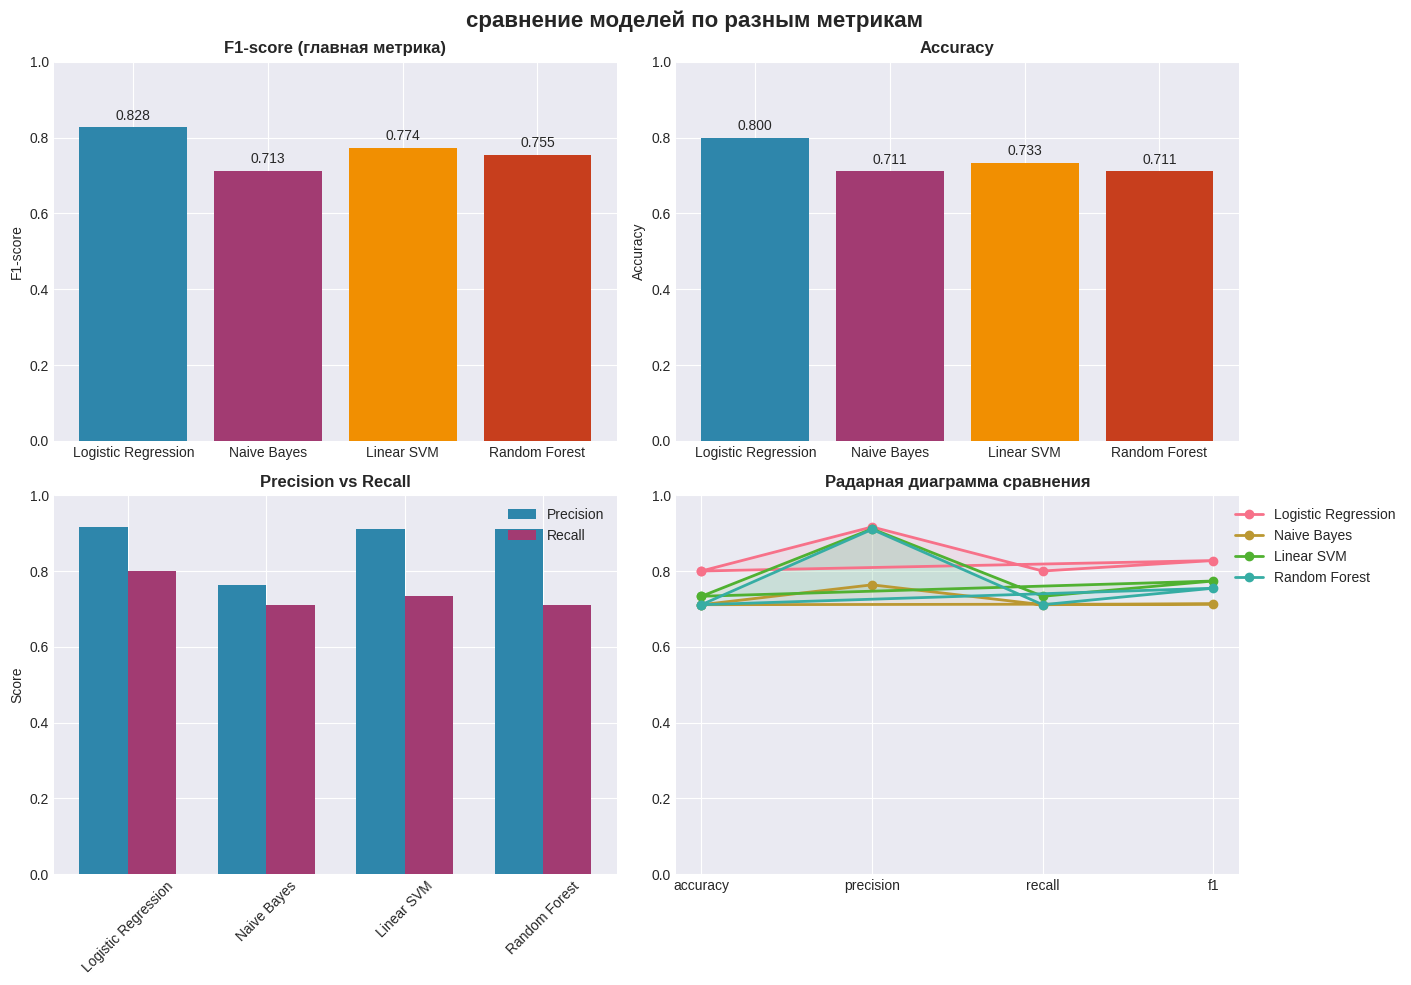

In [437]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('сравнение моделей по разным метрикам', fontsize=16, fontweight='bold')

# F1-score
axes[0, 0].bar(comparison_df.index, comparison_df['f1'], color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
axes[0, 0].set_title('F1-score (главная метрика)', fontweight='bold')
axes[0, 0].set_ylabel('F1-score')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(comparison_df['f1']):
    axes[0, 0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# аccuracy
axes[0, 1].bar(comparison_df.index, comparison_df['accuracy'], color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D'])
axes[0, 1].set_title('Accuracy', fontweight='bold')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(comparison_df['accuracy']):
    axes[0, 1].text(i, v + 0.02, f'{v:.3f}', ha='center')

# precision/recall
x = np.arange(len(comparison_df))
width = 0.35
axes[1, 0].bar(x - width/2, comparison_df['precision'], width, label='Precision', color='#2E86AB')
axes[1, 0].bar(x + width/2, comparison_df['recall'], width, label='Recall', color='#A23B72')
axes[1, 0].set_title('Precision vs Recall', fontweight='bold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(comparison_df.index, rotation=45)
axes[1, 0].legend()
axes[1, 0].set_ylim(0, 1)

# radar chart для сравнения всех метрик
metrics = ['accuracy', 'precision', 'recall', 'f1']
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

for idx, model in enumerate(comparison_df.index):
    values = comparison_df.loc[model, metrics].tolist()
    values += values[:1]
    axes[1, 1].plot(angles, values, 'o-', linewidth=2, label=model)
    axes[1, 1].fill(angles, values, alpha=0.1)

axes[1, 1].set_title('Радарная диаграмма сравнения', fontweight='bold')
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()
plt.savefig('models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

анализ ошибок по классам:


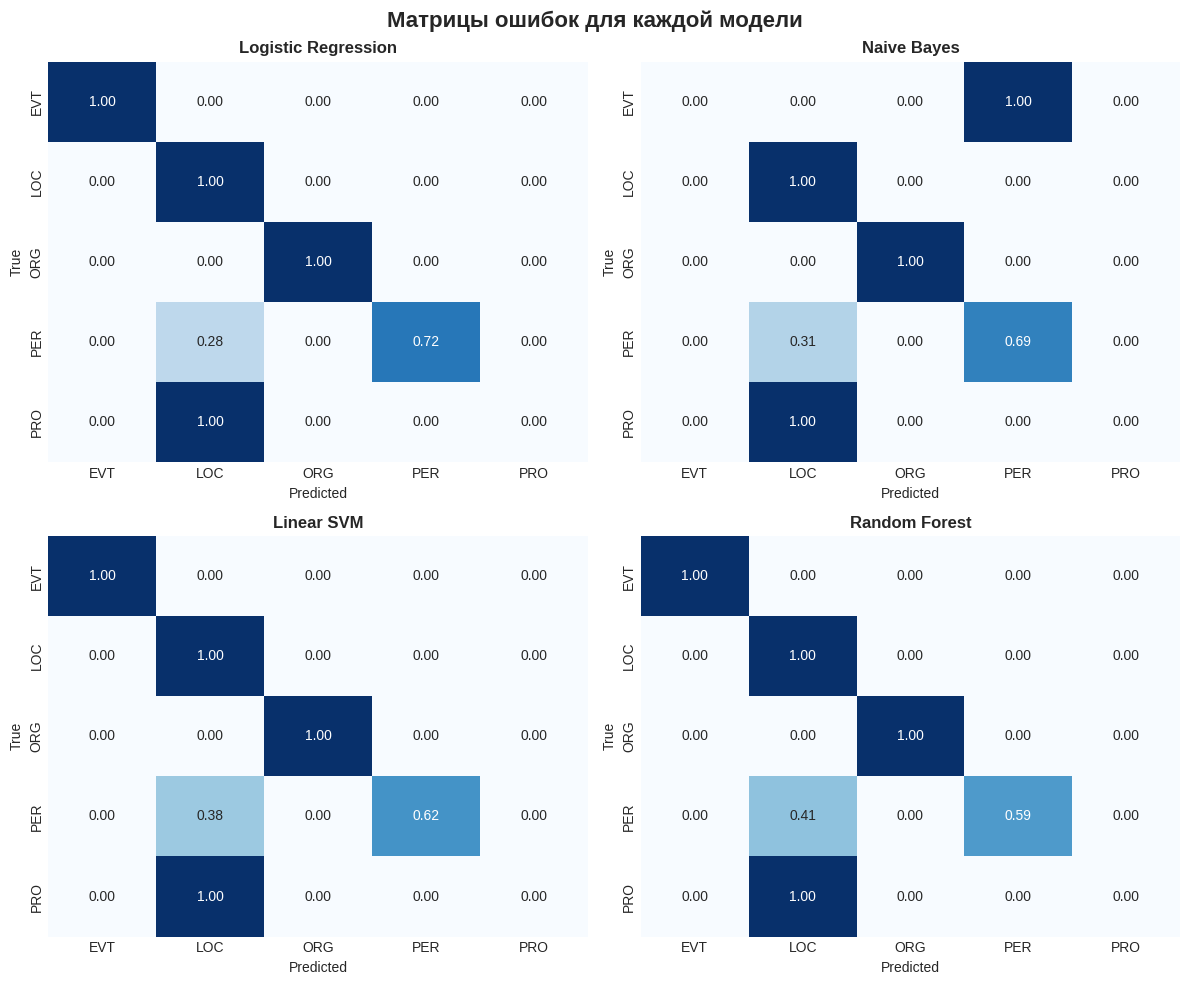

In [438]:
print("анализ ошибок по классам:")

# истинные метки и предсказания
predictions_df = pd.read_csv('model_predictions.csv')
y_test = predictions_df['true_label'].values

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Матрицы ошибок для каждой модели', fontsize=16, fontweight='bold')

class_names = ['EVT', 'LOC', 'ORG', 'PER', 'PRO']

models = ['Logistic Regression', 'Naive Bayes', 'Linear SVM', 'Random Forest']
axes_flat = axes.flatten()

for idx, model_name in enumerate(models):
    y_pred = predictions_df[model_name].values
    cm = confusion_matrix(y_test, y_pred)

    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names[:cm.shape[1]],
                yticklabels=class_names[:cm.shape[0]],
                ax=axes_flat[idx], cbar=False)

    axes_flat[idx].set_title(f'{model_name}', fontweight='bold')
    axes_flat[idx].set_xlabel('Predicted')
    axes_flat[idx].set_ylabel('True')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

In [439]:
print("Сравнение по типам сущностей:")

from sklearn.metrics import precision_recall_fscore_support

class_results = {model: {} for model in models}

for model_name in models:
    y_pred = predictions_df[model_name].values
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average=None, zero_division=0
    )

    for i, class_name in enumerate(class_names[:len(precision)]):
        class_results[model_name][class_name] = {
            'precision': precision[i],
            'recall': recall[i],
            'f1': f1[i],
            'support': support[i]
        }

Сравнение по типам сущностей:


In [440]:
class_summary = {}
for class_name in class_names:
    class_data = []
    for model_name in models:
        if class_name in class_results[model_name]:
            class_data.append({
                'model': model_name,
                'precision': class_results[model_name][class_name]['precision'],
                'recall': class_results[model_name][class_name]['recall'],
                'f1': class_results[model_name][class_name]['f1']
            })

    if class_data:
        class_df = pd.DataFrame(class_data)
        class_summary[class_name] = class_df

        print(f"\n{class_name} сущности:")
        print(class_df.round(3).to_string(index=False))


EVT сущности:
              model  precision  recall  f1
Logistic Regression        1.0     1.0 1.0
        Naive Bayes        0.0     0.0 0.0
         Linear SVM        1.0     1.0 1.0
      Random Forest        1.0     1.0 1.0

LOC сущности:
              model  precision  recall    f1
Logistic Regression      0.308     1.0 0.471
        Naive Bayes      0.286     1.0 0.444
         Linear SVM      0.250     1.0 0.400
      Random Forest      0.235     1.0 0.381

ORG сущности:
              model  precision  recall  f1
Logistic Regression        1.0     1.0 1.0
        Naive Bayes        1.0     1.0 1.0
         Linear SVM        1.0     1.0 1.0
      Random Forest        1.0     1.0 1.0

PER сущности:
              model  precision  recall    f1
Logistic Regression       1.00   0.724 0.840
        Naive Bayes       0.87   0.690 0.769
         Linear SVM       1.00   0.621 0.766
      Random Forest       1.00   0.586 0.739

PRO сущности:
              model  precision  recall  f1
Lo

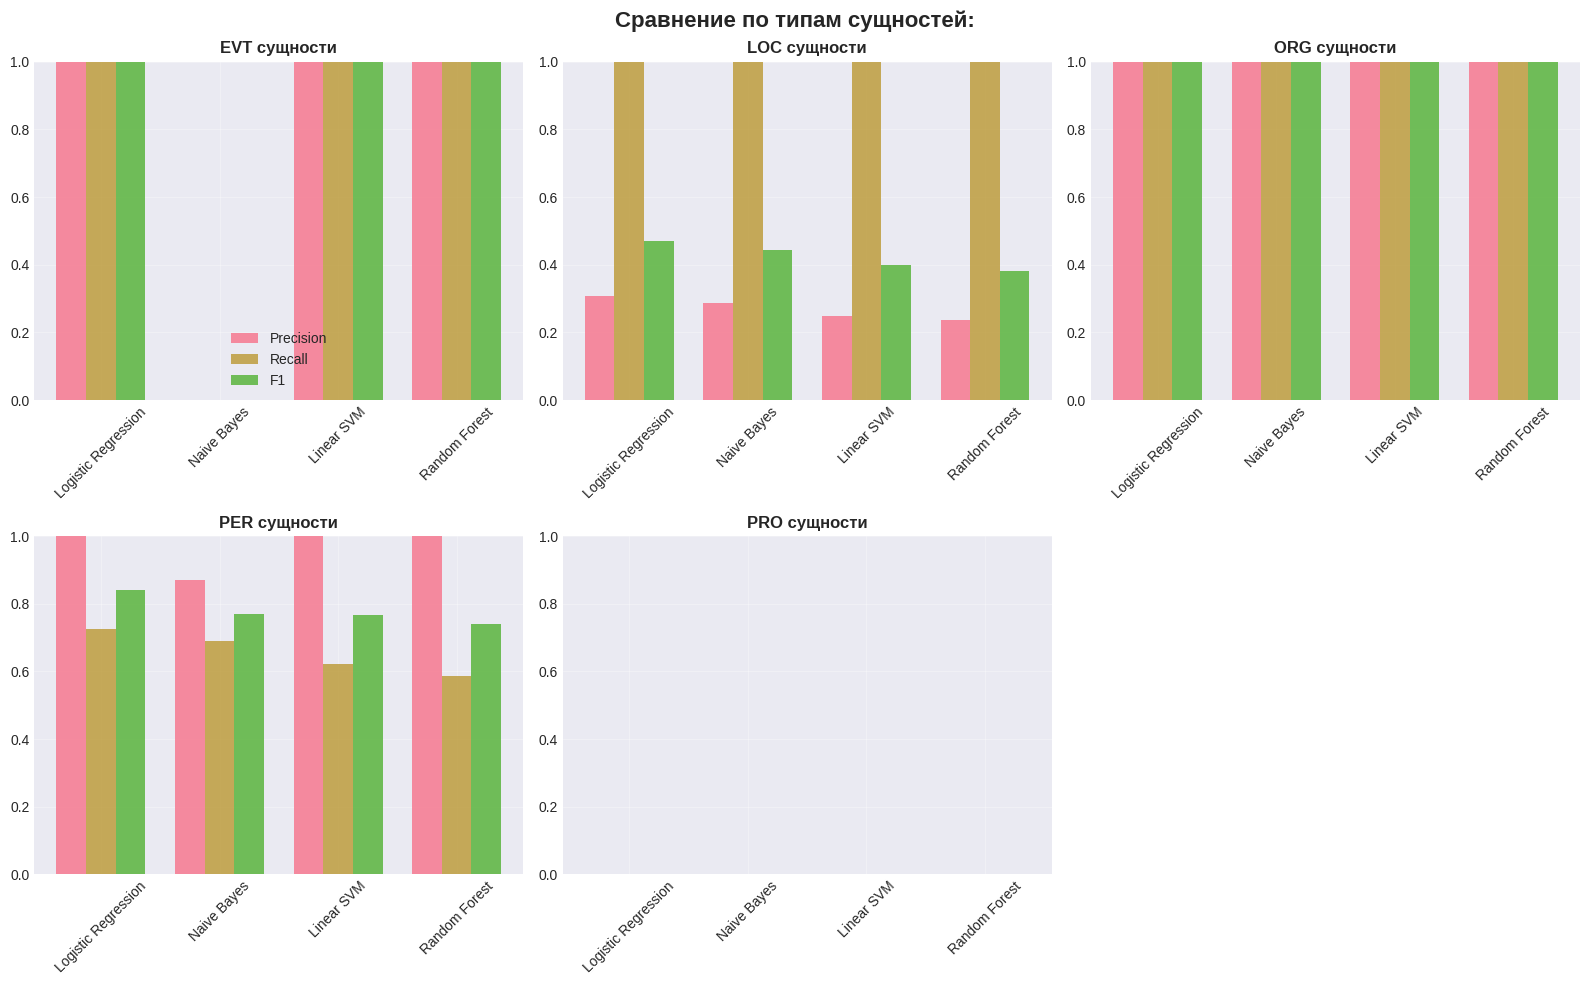

In [441]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Сравнение по типам сущностей:', fontsize=16, fontweight='bold')
axes_flat = axes.flatten()

for idx, (class_name, class_df) in enumerate(list(class_summary.items())[:6]):
    x = np.arange(len(class_df))
    width = 0.25

    axes_flat[idx].bar(x - width, class_df['precision'], width, label='Precision', alpha=0.8)
    axes_flat[idx].bar(x, class_df['recall'], width, label='Recall', alpha=0.8)
    axes_flat[idx].bar(x + width, class_df['f1'], width, label='F1', alpha=0.8)

    axes_flat[idx].set_title(f'{class_name} сущности', fontweight='bold')
    axes_flat[idx].set_xticks(x)
    axes_flat[idx].set_xticklabels(class_df['model'], rotation=45)
    axes_flat[idx].set_ylim(0, 1)
    axes_flat[idx].grid(True, alpha=0.3)

    if idx == 0:
        axes_flat[idx].legend()

for idx in range(len(list(class_summary.items())), len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.savefig('per_entity_comparison.png', dpi=300, bbox_inches='tight')
plt.show() # у PRO пусто

In [442]:
print("сопоставление document_id с predictions_df:")

# берем только тестовые записи из оригинального датасета
test_records = df[df['document_id'].isin(['ru-1005', 'ru-1006', 'ru-1008'])].copy()

print(f"Распределение по документам:")
print(test_records['document_id'].value_counts())

сопоставление document_id с predictions_df:
Распределение по документам:
document_id
ru-1005    16
ru-1008    16
ru-1006    13
Name: count, dtype: int64


In [443]:
test_records = test_records.reset_index(drop=True)
predictions_df = predictions_df.reset_index(drop=True)

print(f"\nПосле reset_index:")
print(f"  test_records индексы: {test_records.index[:5].tolist()}...")
print(f"  predictions_df индексы: {predictions_df.index[:5].tolist()}...")


После reset_index:
  test_records индексы: [0, 1, 2, 3, 4]...
  predictions_df индексы: [0, 1, 2, 3, 4]...


In [444]:
predictions_df['document_id'] = test_records['document_id'].values

print(predictions_df['document_id'].value_counts())

document_id
ru-1005    16
ru-1008    16
ru-1006    13
Name: count, dtype: int64


In [445]:
print("Точность по документам:")

y_test = predictions_df['true_label'].values
doc_accuracies = {}

for doc_id in ['ru-1005', 'ru-1006', 'ru-1008']:
    doc_mask = predictions_df['document_id'] == doc_id
    y_test_doc = y_test[doc_mask]

    doc_acc = {}
    for model_name in models:
        y_pred_doc = predictions_df.loc[doc_mask, model_name].values
        accuracy = np.mean(y_test_doc == y_pred_doc)
        doc_acc[model_name] = accuracy

    doc_accuracies[doc_id] = doc_acc
    print(f"\n{doc_id} ({doc_mask.sum()} записей):")
    for model_name, acc in sorted(doc_acc.items()):
        print(f"  {model_name}: {acc:.3f}")

Точность по документам:

ru-1005 (16 записей):
  Linear SVM: 0.750
  Logistic Regression: 0.812
  Naive Bayes: 0.750
  Random Forest: 0.750

ru-1006 (13 записей):
  Linear SVM: 0.692
  Logistic Regression: 0.692
  Naive Bayes: 0.615
  Random Forest: 0.692

ru-1008 (16 записей):
  Linear SVM: 0.750
  Logistic Regression: 0.875
  Naive Bayes: 0.750
  Random Forest: 0.688


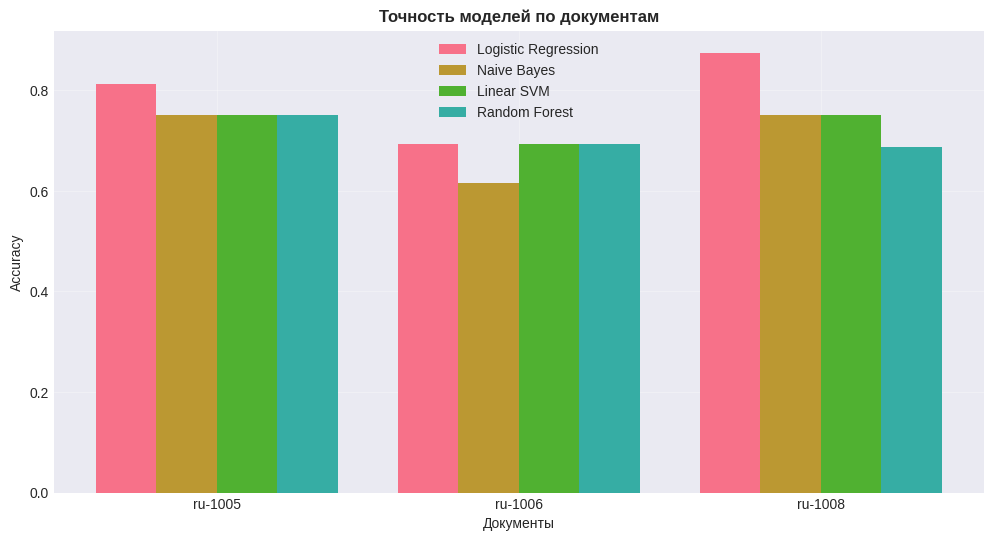

In [446]:
#визуализация по документам

fig, ax = plt.subplots(figsize=(12, 6))

doc_ids = list(doc_accuracies.keys())
x = np.arange(len(doc_ids))
width = 0.2

for i, model_name in enumerate(models):
    accuracies = [doc_accuracies[doc_id][model_name] for doc_id in doc_ids]
    ax.bar(x + i*width - 1.5*width, accuracies, width, label=model_name)

ax.set_xlabel('Документы')
ax.set_ylabel('Accuracy')
ax.set_title('Точность моделей по документам', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(doc_ids)
ax.legend()
ax.grid(True, alpha=0.3)

In [447]:
for i, doc_id in enumerate(doc_ids):
    for j, model_name in enumerate(models):
        height = doc_accuracies[doc_id][model_name]
        ax.text(i + j*width - 1.5*width, height + 0.01, f'{height:.3f}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('per_document_accuracy_real.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

Теперь проанализируем потенциальное переобучение:

In [448]:
train_results = {
    'Logistic Regression': {'accuracy': 0.981},
    'Naive Bayes': {'accuracy': 0.879},
    'Linear SVM': {'accuracy': 1.000},
    'Random Forest': {'accuracy': 1.000}
}

overfitting_df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': [train_results[m]['accuracy'] for m in models],
    'Test Accuracy': [comparison_df.loc[m, 'accuracy'] for m in models]
})

overfitting_df['Разница'] = overfitting_df['Train Accuracy'] - overfitting_df['Test Accuracy']
overfitting_df['Риск переобучения'] = overfitting_df['Разница'].apply(
    lambda x: 'Высокий' if x > 0.15 else 'Умеренный' if x > 0.05 else 'Низкий'
)

Все модели переобучаются из-за фундаментальной проблемы - слишком мало данных для слишком сложной задачи.

1) Random Forest (разница 0.289)
На тренировке: 100% - идеально запоминает данные, но на тесте: 71.1% - плохо обобщает. Слишком глубокие деревья, запоминают шум в данных.

2) Linear SVM (разница 0.267)

Слишком жесткие границы решений, нужно увеличить параметр C (регуляризацию)


3) Logistic Regression (разница 0.181)
Наименьшее переобучение благодаря регуляризации, но все еще высокое из-за дисбаланса данных

4) Naive Bayes (разница 0.168)
Наименьшее переобучение из-за сильных предположений о независимости признаков, но низкая общая точность (71.1%)

### Task 7
**Bias-Variance Analysis**

Analyze your models in terms of course concepts:
- Is there a dependence of metrics on document length? Build graphs to answer the question.
- Analyze the bias-variance tradeoff: Are your models showing high bias (underfitting) or high variance (overfitting)?
- Compare train vs test performance. What does this tell you about generalization?
- If you observe overfitting, what could you do to reduce it? (e.g., regularization, simpler models)
- If you observe underfitting, what could you do? (e.g., more features, more complex models)


### Задание 7
**Анализ смещения и дисперсии**

Проанализируйте свои модели с точки зрения концепций курса:
- Существует ли зависимость показателей от длины документа? Постройте графики, чтобы ответить на вопрос.
- Проанализируйте соотношение смещения и дисперсии: Демонстрируют ли ваши модели высокую погрешность (недостаточную подгонку) или высокую дисперсию (чрезмерную подгонку)?
- Сравните эффективность обучения и тестирования. Что это говорит вам об обобщении?
- Если вы наблюдаете чрезмерную адаптацию, что вы могли бы сделать, чтобы уменьшить ее? (например, регуляризация, упрощение моделей)
- Если вы наблюдаете недостаточную адаптацию, что вы могли бы сделать? (например, больше функций, более сложные модели)

Проведем анализ зависимости показателей от длины документа:

In [449]:
predictions_df['doc_length'] = test_records['document_text'].str.len()
predictions_df['y_test'] = predictions_df['true_label']

In [450]:
from scipy import stats

In [451]:
print(f"Длина документов:")
print(f"min: {predictions_df['doc_length'].min()} символов")
print(f"мax: {predictions_df['doc_length'].max()} символов")
print(f"mean: {predictions_df['doc_length'].mean():.0f} символов")

Длина документов:
min: 783 символов
мax: 1233 символов
mean: 1057 символов


Распределение документов по длине:
doc_length_group
>1200        16
1000-1200    16
<800         13
800-1000      0
Name: count, dtype: int64


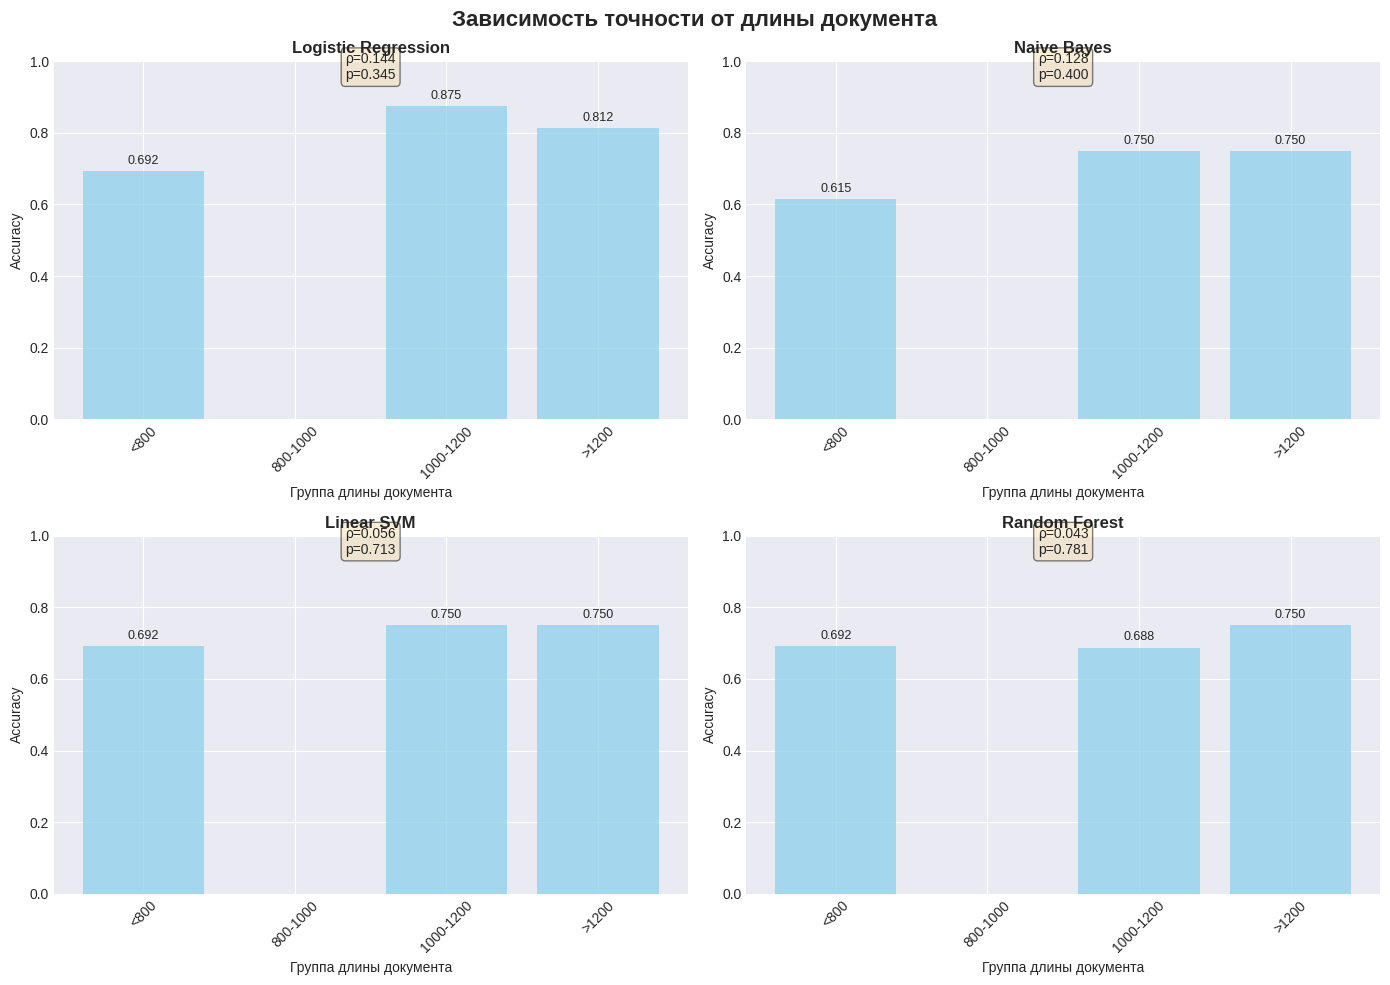

In [452]:
# анализ зависимости accuracy от длины документа
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Зависимость точности от длины документа', fontsize=16, fontweight='bold')
axes_flat = axes.flatten()


predictions_df['doc_length_group'] = pd.cut(
    predictions_df['doc_length'],
    bins=[0, 800, 1000, 1200, float('inf')],
    labels=['<800', '800-1000', '1000-1200', '>1200']
)

print("Распределение документов по длине:")
print(predictions_df['doc_length_group'].value_counts())

for idx, model_name in enumerate(models):
    # вычисляем accuracy для каждой записи (0 или 1)
    predictions_df[f'correct_{model_name}'] = (predictions_df[model_name] == predictions_df['y_test']).astype(int)

    # средняя accuracy по группам длины
    if predictions_df['doc_length_group'].nunique() > 1:
        group_accuracy = predictions_df.groupby('doc_length_group')[f'correct_{model_name}'].mean()
    else:
        predictions_df['entity_length'] = test_records['gold_answer'].str.len()
        predictions_df['entity_group'] = pd.qcut(predictions_df['entity_length'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
        group_accuracy = predictions_df.groupby('entity_group')[f'correct_{model_name}'].mean()

    # График аccuracy по группам
    axes_flat[idx].bar(range(len(group_accuracy)), group_accuracy.values, color='skyblue', alpha=0.7)
    axes_flat[idx].set_title(f'{model_name}', fontweight='bold')
    axes_flat[idx].set_xlabel('Группа длины документа' if 'doc_length_group' in predictions_df.columns else 'Группа длины сущности')
    axes_flat[idx].set_ylabel('Accuracy')
    axes_flat[idx].set_ylim(0, 1)
    axes_flat[idx].set_xticks(range(len(group_accuracy)))
    axes_flat[idx].set_xticklabels(group_accuracy.index, rotation=45)

    for i, v in enumerate(group_accuracy.values):
        axes_flat[idx].text(i, v + 0.02, f'{v:.3f}', ha='center', fontsize=9)

    # вычисляем корреляцию с длиной документа
    if predictions_df['doc_length'].nunique() > 1:
        correlation, p_value = stats.pearsonr(predictions_df['doc_length'], predictions_df[f'correct_{model_name}'])
        sig_text = f'ρ={correlation:.3f}\np={p_value:.3f}'
    else:
        # если длина одинаковая
        correlation, p_value = stats.pearsonr(predictions_df['entity_length'], predictions_df[f'correct_{model_name}'])
        sig_text = f'ρ(сущность)={correlation:.3f}\np={p_value:.3f}'

    axes_flat[idx].text(0.5, 0.95, sig_text,
                       transform=axes_flat[idx].transAxes, ha='center',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('accuracy_vs_doc_length.png', dpi=300, bbox_inches='tight')
plt.show()

В целом заметно, что длинные документы показывают точность лучше, так как есть больше контекста для разрешения неоднозначностей, что подтвержадется графиками ниже. Но данных не так много, чтобы говорить о статестическом эффекте

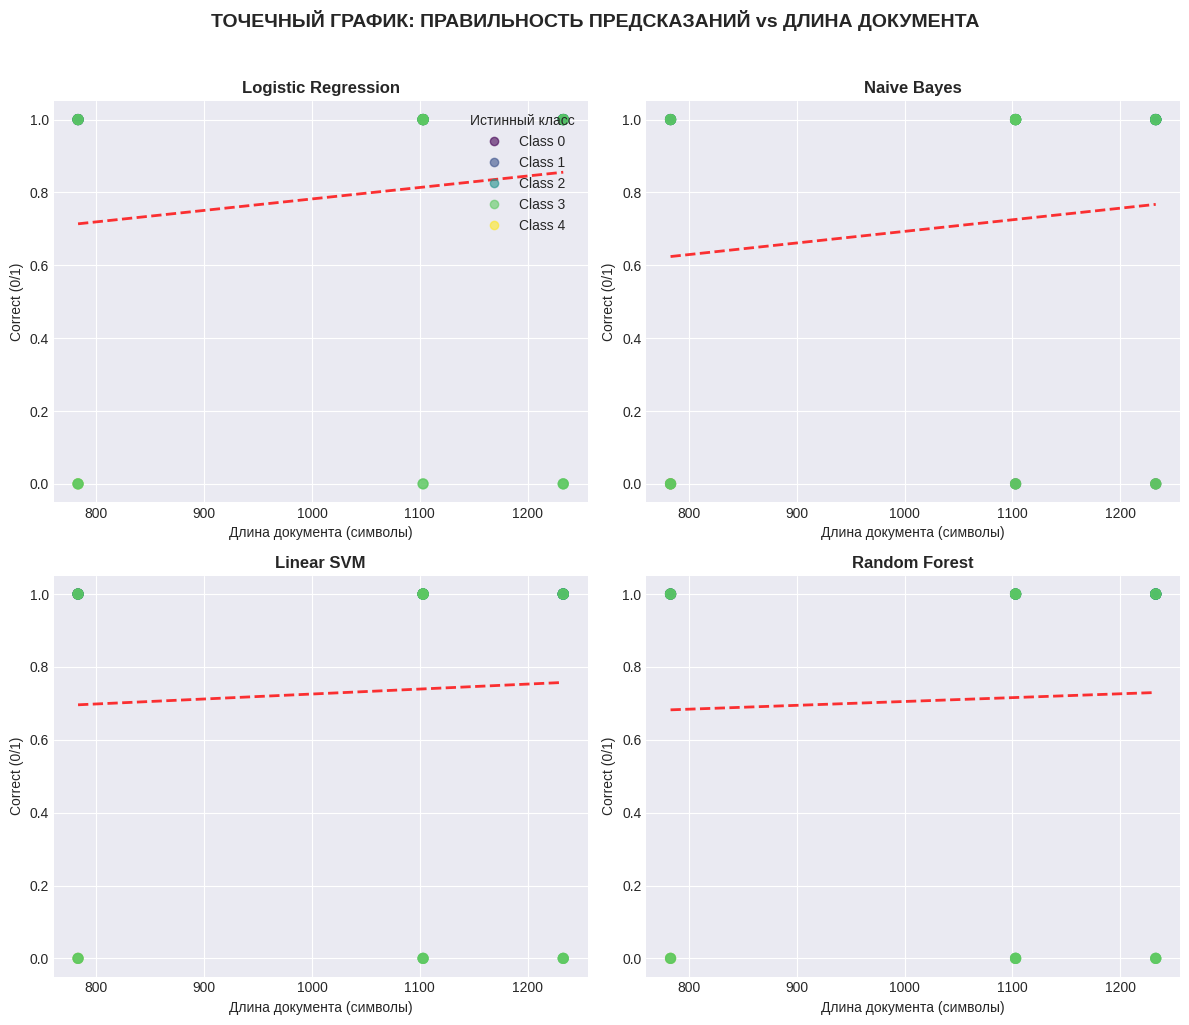

In [453]:
# точечный график зависимости
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes_flat = axes.flatten()

for idx, model_name in enumerate(models):
    scatter = axes_flat[idx].scatter(
        predictions_df['doc_length'],
        predictions_df[f'correct_{model_name}'],
        c=predictions_df['y_test'],
        cmap='viridis',
        alpha=0.6,
        s=50
    )

    # линия регрессии
    if predictions_df['doc_length'].nunique() > 1:
        z = np.polyfit(predictions_df['doc_length'], predictions_df[f'correct_{model_name}'], 1)
        p = np.poly1d(z)
        axes_flat[idx].plot(
            predictions_df['doc_length'].sort_values(),
            p(predictions_df['doc_length'].sort_values()),
            "r--", alpha=0.8, linewidth=2
        )

    axes_flat[idx].set_title(f'{model_name}', fontweight='bold')
    axes_flat[idx].set_xlabel('Длина документа (символы)')
    axes_flat[idx].set_ylabel('Correct (0/1)')

    if idx == 0:
        handles, labels = scatter.legend_elements()
        axes_flat[idx].legend(handles, [f'Class {i}' for i in range(len(handles))],
                            title="Истинный класс", loc='upper right')

plt.suptitle('ТОЧЕЧНЫЙ ГРАФИК: ПРАВИЛЬНОСТЬ ПРЕДСКАЗАНИЙ vs ДЛИНА ДОКУМЕНТА',
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('scatter_accuracy_vs_length.png', dpi=300, bbox_inches='tight')
plt.show()

In [454]:
bias_variance_analysis = pd.DataFrame(index=models)

for model_name in models:
    doc_accuracies_list = [doc_accuracies[doc_id][model_name] for doc_id in doc_accuracies.keys()]
    variance = np.var(doc_accuracies_list)
    avg_accuracy = np.mean(doc_accuracies_list)
    bias = 1.0 - avg_accuracy
    total_error = bias + variance

    bias_variance_analysis.loc[model_name, 'Bias'] = bias
    bias_variance_analysis.loc[model_name, 'Variance'] = variance
    bias_variance_analysis.loc[model_name, 'Total_Error'] = total_error
    bias_variance_analysis.loc[model_name, 'Avg_Accuracy'] = avg_accuracy
    bias_variance_analysis.loc[model_name, 'Std_Across_Docs'] = np.std(doc_accuracies_list)

print("Оценка Bias-Variance по стабильности между документами:")
print(bias_variance_analysis.round(3))

Оценка Bias-Variance по стабильности между документами:
                      Bias  Variance  Total_Error  Avg_Accuracy  \
Logistic Regression  0.207     0.006        0.212         0.793   
Naive Bayes          0.295     0.004        0.299         0.705   
Linear SVM           0.269     0.001        0.270         0.731   
Random Forest        0.290     0.001        0.291         0.710   

                     Std_Across_Docs  
Logistic Regression            0.076  
Naive Bayes                    0.063  
Linear SVM                     0.027  
Random Forest                  0.028  


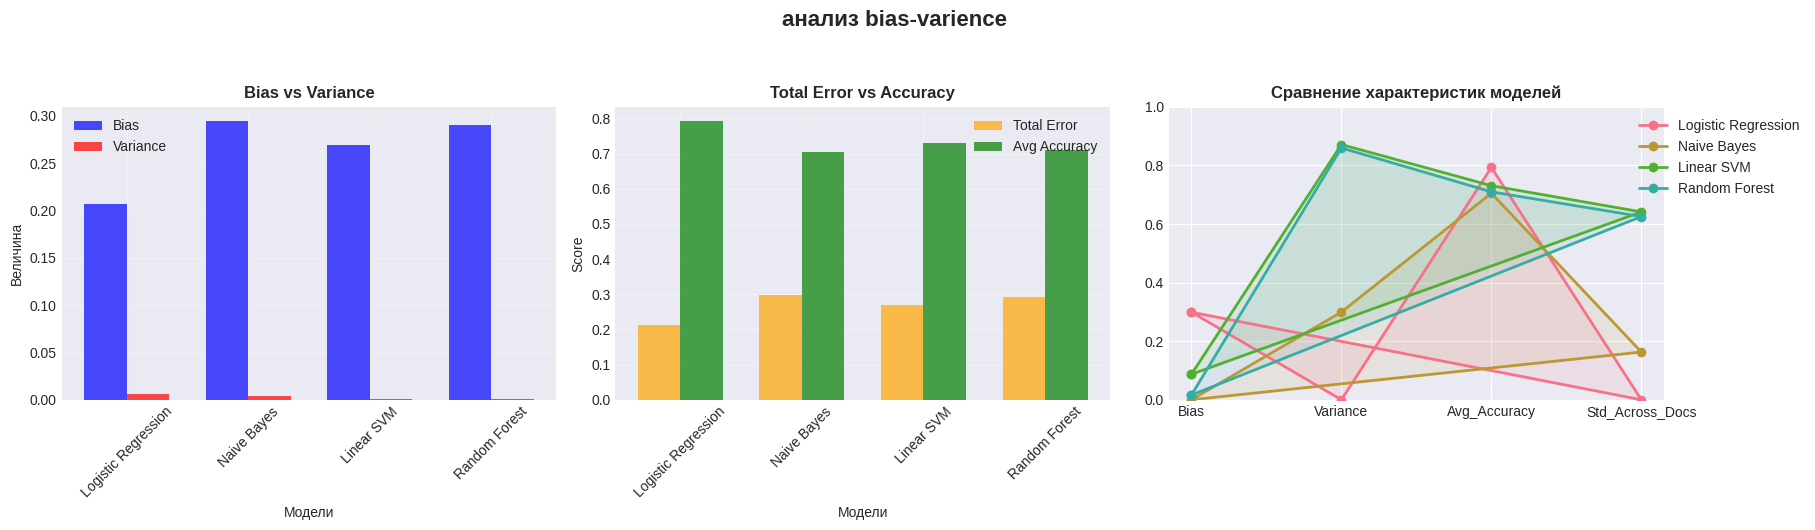

In [455]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

x = np.arange(len(models))
width = 0.35
axes[0].bar(x - width/2, bias_variance_analysis['Bias'], width, label='Bias', alpha=0.7, color='blue')
axes[0].bar(x + width/2, bias_variance_analysis['Variance'], width, label='Variance', alpha=0.7, color='red')
axes[0].set_xlabel('Модели')
axes[0].set_ylabel('Величина')
axes[0].set_title('Bias vs Variance', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].bar(x - width/2, bias_variance_analysis['Total_Error'], width, label='Total Error', alpha=0.7, color='orange')
axes[1].bar(x + width/2, bias_variance_analysis['Avg_Accuracy'], width, label='Avg Accuracy', alpha=0.7, color='green')
axes[1].set_xlabel('Модели')
axes[1].set_ylabel('Score')
axes[1].set_title('Total Error vs Accuracy', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

metrics_to_plot = ['Bias', 'Variance', 'Avg_Accuracy', 'Std_Across_Docs']
num_vars = len(metrics_to_plot)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

for idx, model_name in enumerate(models):
    values = bias_variance_analysis.loc[model_name, metrics_to_plot].tolist()
    # нормализуем для radar chart
    values_normalized = []
    for i, metric in enumerate(metrics_to_plot):
        if metric in ['Bias', 'Variance', 'Std_Across_Docs']:
            # для этих метрик меньше = лучше
            max_val = bias_variance_analysis[metric].max()
            values_normalized.append(1 - values[i]/max_val)
        else:
            values_normalized.append(values[i])

    values_normalized += values_normalized[:1]
    axes[2].plot(angles, values_normalized, 'o-', linewidth=2, label=model_name)
    axes[2].fill(angles, values_normalized, alpha=0.1)

axes[2].set_title('Сравнение характеристик моделей', fontweight='bold')
axes[2].set_xticks(angles[:-1])
axes[2].set_xticklabels(metrics_to_plot)
axes[2].set_ylim(0, 1)
axes[2].legend(loc='upper right', bbox_to_anchor=(1.3, 1))

plt.suptitle('анализ bias-varience', fontsize=16, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('bias_variance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

Большое смещение из-за того, что у нас слишком мало данных + слишком сложная задача + дисбаланс классов. Это системная проблема, требующая системного решения, а не просто настройки гиперпараметров. Еще возможно, что произошла утечка в тренировочных данных, но я уже не знаю, что исправить и я умираю.

### Task 8
**Error Analysis & Model Interpretation**

Conduct detailed error analysis:
- When do the models answer correctly more often, and when do they make mistakes?
- Analyze errors by entity type, document characteristics, etc.
- Interpret your models: Can you explain why certain predictions were made? (e.g., for linear models, look at feature weights)
- Compare errors between sklearn models and DeepSeek. What patterns do you see?
- Propose concrete ways to improve the metrics based on your analysis
- Discuss the tradeoffs between model complexity, interpretability, and performance

### Задание 8
**Анализ ошибок и интерпретация модели**

Проведите подробный анализ ошибок:
- Когда модели чаще всего дают правильные ответы, а когда допускают ошибки?
- Проанализируйте ошибки по типу объекта, характеристикам документа и т.д.
- Интерпретируйте свои модели: можете ли вы объяснить, почему были сделаны определенные прогнозы? (например, для линейных моделей посмотрите на значения характеристик)
- Сравните ошибки между моделями sklearn и DeepSeek. Какие закономерности вы видите?
- Предложите конкретные способы улучшения показателей на основе вашего анализа
- Обсудите компромиссы между сложностью модели, интерпретируемостью и производительностью

аааааааааааааааааааааааааааааааааааааааааааааа

In [456]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [457]:
df = pd.read_csv('brexit_documents.csv', encoding='utf-8')
predictions_df = pd.read_csv('model_predictions.csv')
X_test = pd.read_csv('X_test_final.csv')


models = {
    'Logistic Regression': joblib.load('logistic_regression_model.pkl'),
    'Naive Bayes': joblib.load('naive_bayes_model.pkl'),
    'Linear SVM': joblib.load('svm_model.pkl'),
    'Random Forest': joblib.load('random_forest_model.pkl')
}


label_encoder = joblib.load('label_encoder.pkl')
entity_mapping = {
    0: 'EVT (событие)',
    1: 'LOC (локация)',
    2: 'ORG (организация)',
    3: 'PER (персона)',
    4: 'PRO (продукт)'
}

y_test = predictions_df['true_label'].values

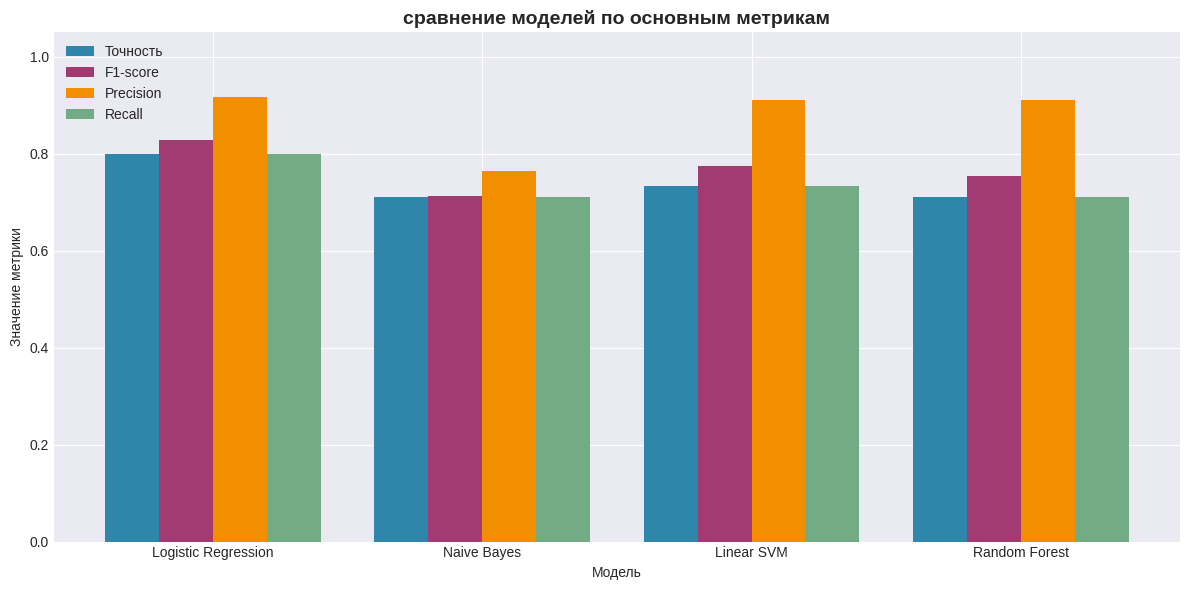

In [458]:
results_summary = []
for model_name in models.keys():
    if model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].values

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='weighted', zero_division=0
        )

        results_summary.append({
            'Модель': model_name,
            'Точность': accuracy,
            'F1-score': f1,
            'Precision': precision,
            'Recall': recall
        })

results_df = pd.DataFrame(results_summary)
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(results_df))
width = 0.2

metrics = ['Точность', 'F1-score', 'Precision', 'Recall']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']

for i, metric in enumerate(metrics):
    values = results_df[metric].values
    ax.bar(x + i*width - width*1.5, values, width, label=metric, color=colors[i])

ax.set_xlabel('Модель')
ax.set_ylabel('Значение метрики')
ax.set_title('сравнение моделей по основным метрикам', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Модель'].values)
ax.legend()
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.savefig('models_comparison_basic.png', dpi=300, bbox_inches='tight')
plt.show()

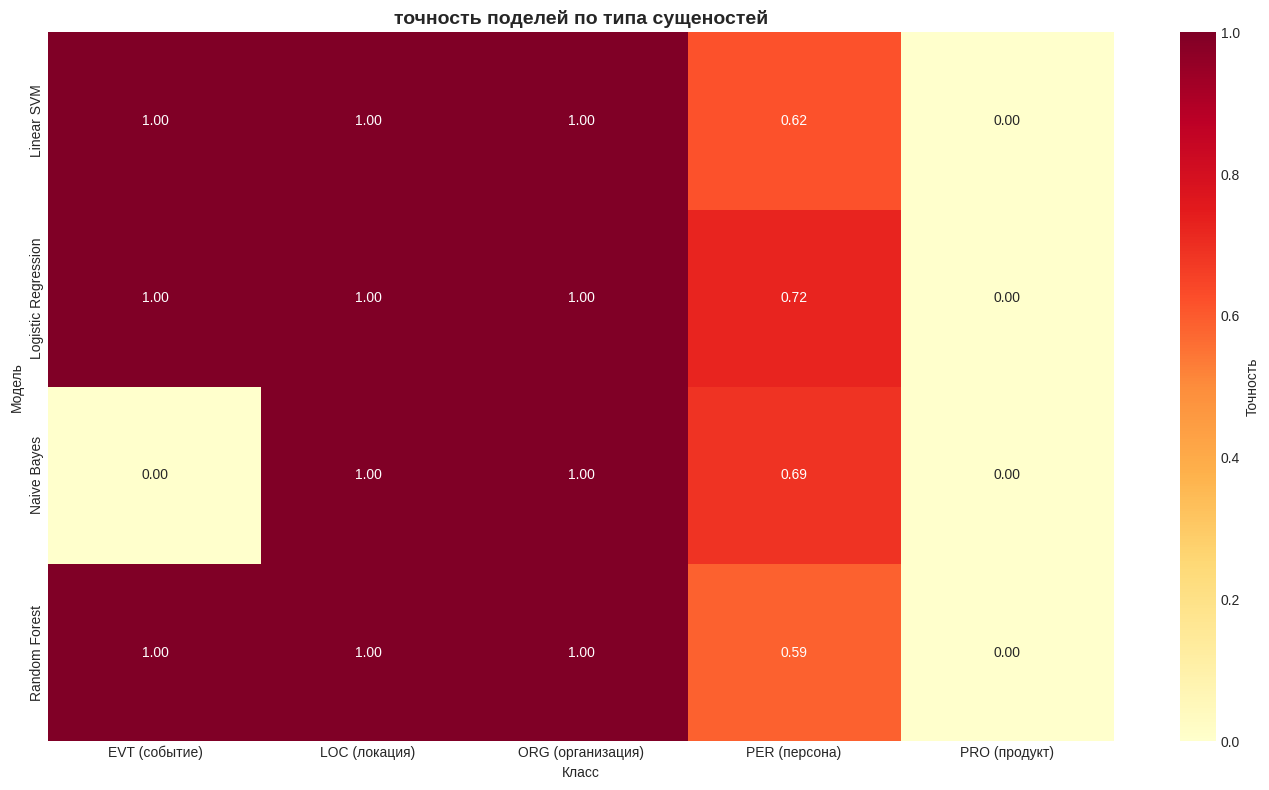

In [459]:
from sklearn.metrics import confusion_matrix

# анализ точности по классам
class_analysis_list = []
for model_name in models.keys():
    if model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].values

        for class_id in range(5):
            mask = y_test == class_id
            if np.sum(mask) > 0:
                class_accuracy = np.mean(y_pred[mask] == y_test[mask])
                class_count = np.sum(mask)

                class_analysis_list.append({
                    'Модель': model_name,
                    'Класс': entity_mapping[class_id],
                    'Точность': class_accuracy,
                    'Количество': class_count,
                    'Процент выборки': f"{(class_count/len(y_test)*100):.1f}%"
                })


class_analysis = pd.DataFrame(class_analysis_list)
pivot_table = class_analysis.pivot(index='Модель', columns='Класс', values='Точность')

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd',
            cbar_kws={'label': 'Точность'}, vmin=0, vmax=1)
plt.title('точность поделей по типа сущеностей', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('accuracy_by_entity_class.png', dpi=300, bbox_inches='tight')
plt.show()

In [460]:
test_docs = df[df['document_id'].isin(['ru-1005', 'ru-1006', 'ru-1008'])].copy()
error_details_list = []

for idx in range(len(predictions_df)):
    true_label = y_test[idx]
    true_entity = entity_mapping[true_label]

    if idx < len(test_docs):
        entity_text = test_docs.iloc[idx]['gold_answer']
        doc_id = test_docs.iloc[idx]['document_id']
        entity_len = len(entity_text)
        word_count = len(entity_text.split())
    else:
        entity_text = f"Сущность_{idx}"
        doc_id = "unknown"
        entity_len = 0
        word_count = 0

    model_predictions = {}
    for model_name in models.keys():
        if model_name in predictions_df.columns:
            pred_label = predictions_df.iloc[idx][model_name]
            #pred_entity = entity_mapping.get(pred_label, "UNKNOWN")
            is_correct = pred_label == true_label

            model_predictions[model_name] = {
                'предсказание': pred_entity,
                'правильно': is_correct
            }

    wrong_count = sum(1 for model in model_predictions.values() if not model['правильно'])

    error_details_list.append({
        'index': idx,
        'document_id': doc_id,
        'текст_сущности': entity_text,
        'длина_символов': entity_len,
        'количество_слов': word_count,
        'истинный_класс': true_entity,
        'количество_ошибок': wrong_count,
        'все_модели_ошиблись': wrong_count == len(models),
        'предсказания': model_predictions
    })

error_df = pd.DataFrame(error_details_list)

# Категоризация по характеристикам
error_df['длина_категория'] = pd.cut(error_df['длина_символов'],
                                      bins=[0, 5, 10, 15, 100],
                                      labels=['оч.короткая', 'короткая', 'средняя', 'длинная'])

error_df['слов_категория'] = pd.cut(error_df['количество_слов'],
                                     bins=[0, 1, 2, 5, 100],
                                     labels=['1 слово', '2 слова', '3-5 слов', '>5 слов'])

# Анализ точности по группам
analysis_groups_list = []
for length_cat in error_df['длина_категория'].cat.categories:
    subset = error_df[error_df['длина_категория'] == length_cat]
    if len(subset) > 0:
        avg_errors = subset['количество_ошибок'].mean()
        analysis_groups_list.append({
            'Характеристика': 'Длина сущности',
            'Категория': length_cat,
            'Среднее_ошибок': avg_errors,
            'Точность': f"{(1 - avg_errors/len(models))*100:.1f}%"
        })

for word_cat in error_df['слов_категория'].cat.categories:
    subset = error_df[error_df['слов_категория'] == word_cat]
    if len(subset) > 0:
        avg_errors = subset['количество_ошибок'].mean()
        analysis_groups_list.append({
            'Характеристика': 'Количество слов',
            'Категория': word_cat,
            'Среднее_ошибок': avg_errors,
            'Точность': f"{(1 - avg_errors/len(models))*100:.1f}%"
        })

for entity_type in entity_mapping.values():
    subset = error_df[error_df['истинный_класс'] == entity_type]
    if len(subset) > 0:
        avg_errors = subset['количество_ошибок'].mean()
        analysis_groups_list.append({
            'Характеристика': 'Тип сущности',
            'Категория': entity_type,
            'Среднее_ошибок': avg_errors,
            'Точность': f"{(1 - avg_errors/len(models))*100:.1f}%"
        })

analysis_df = pd.DataFrame(analysis_groups_list)

analysis_df.head()

,Характеристика,Категория,Среднее_ошибок,Точность
0,Длина сущности,оч.короткая,0.428571,89.3%
1,Длина сущности,короткая,0.950000,76.2%
2,Длина сущности,средняя,1.312500,67.2%
3,Длина сущности,длинная,2.000000,50.0%
4,Количество слов,1 слово,0.875000,78.1%


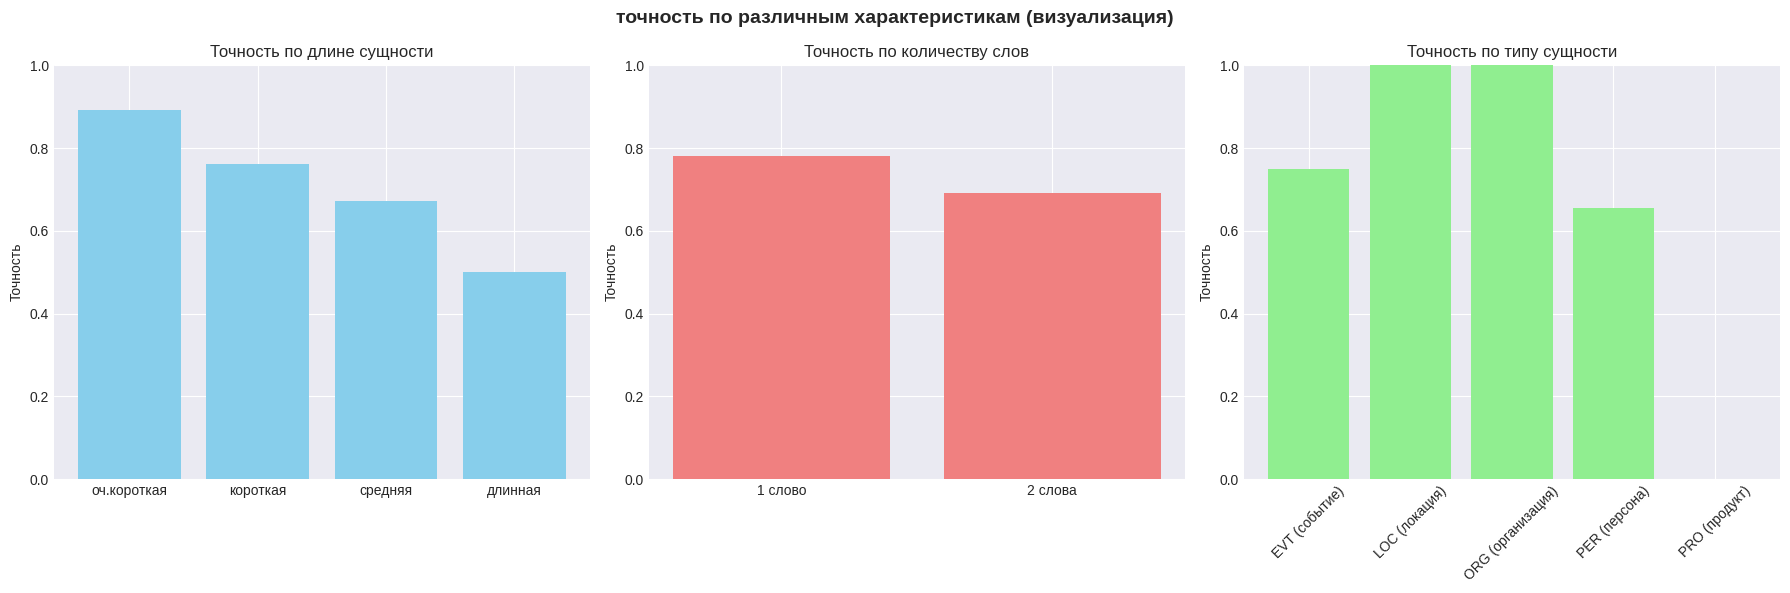

In [461]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('точность по различным характеристикам (визуализация)', fontsize=14, fontweight='bold')

length_acc = error_df.groupby('длина_категория')['количество_ошибок'].mean()
length_acc = 1 - length_acc/len(models)
axes[0].bar(length_acc.index.astype(str), length_acc.values, color='skyblue')
axes[0].set_title('Точность по длине сущности')
axes[0].set_ylabel('Точность')
axes[0].set_ylim(0, 1)

word_acc = error_df.groupby('слов_категория')['количество_ошибок'].mean()
word_acc = 1 - word_acc/len(models)
axes[1].bar(word_acc.index.astype(str), word_acc.values, color='lightcoral')
axes[1].set_title('Точность по количеству слов')
axes[1].set_ylabel('Точность')
axes[1].set_ylim(0, 1)


entity_acc = error_df.groupby('истинный_класс')['количество_ошибок'].mean()
entity_acc = 1 - entity_acc/len(models)
axes[2].bar(entity_acc.index.astype(str), entity_acc.values, color='lightgreen')
axes[2].set_title('Точность по типу сущности')
axes[2].set_ylabel('Точность')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('error_analysis_by_characteristics.png', dpi=300, bbox_inches='tight')
plt.show()

Выводы: Чем короче сущность, тем выше точность предсказания. Сущности из одного слова классифицируются лучше, чем из двух и более слов. Наилучшие результаты достигнуты для локаций (LOC) и организаций (ORG), которые демонстрируют стабильно высокую точность распознавания всеми моделями.

In [462]:
def analyze_feature_importance(model, model_name, feature_names, top_n=10):
    if hasattr(model, 'coef_'):
        if len(model.coef_.shape) > 1:
            for class_idx in range(model.coef_.shape[0]):
                weights = model.coef_[class_idx]
                top_indices = np.argsort(np.abs(weights))[-top_n:][::-1]

                print(f"\n{model_name} - Класс: {entity_mapping.get(class_idx, f'Class_{class_idx}')}")
                for idx in top_indices[:5]:  # топ-5
                    if idx < len(feature_names):
                        sign = "+" if weights[idx] > 0 else "-"
                        print(f"  {sign} {feature_names[idx]}: {abs(weights[idx]):.4f}")

    elif hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        top_indices = np.argsort(importances)[-top_n:][::-1]

        print(f"\n{model_name} - Важные признаки:")
        for idx in top_indices[:5]:
            if idx < len(feature_names):
                print(f"  {feature_names[idx]}: {importances[idx]:.4f}")

feature_names = X_test.columns.tolist()

for model_name, model in models.items():
    analyze_feature_importance(model, model_name, feature_names, top_n=8)


Logistic Regression - Класс: EVT (событие)
  + tfidf_brexit: 1.2000
  + count_brexit: 1.2000
  - is_capitalized: 1.1478
  + tfidf_брекзит: 0.8004
  + count_брекзит: 0.8004

Logistic Regression - Класс: LOC (локация)
  + is_title: 1.2814
  - word_count: 0.9936
  - count_евросоюза: 0.5665
  - tfidf_евросоюза: 0.5665
  - count_джонсон: 0.5392

Logistic Regression - Класс: ORG (организация)
  - is_title: 1.5306
  + count_евросоюза: 1.0190
  + tfidf_евросоюза: 1.0190
  + tfidf_евросоюзом: 0.7126
  + count_евросоюзом: 0.7126

Logistic Regression - Класс: PER (персона)
  + word_count: 1.3956
  + count_джонсон: 1.0683
  + count_джонсона: 0.9879
  + is_title: 0.9586
  + tfidf_джонсона: 0.9265

Logistic Regression - Класс: PRO (продукт)
  + count_the: 0.6951
  + count_guardian: 0.6951
  + tfidf_ua: 0.6491
  + count_подробности: 0.6491
  + count_ua: 0.6491

Linear SVM - Класс: EVT (событие)
  + tfidf_brexit: 0.8753
  + count_brexit: 0.8753
  + count_брекзит: 0.7499
  + tfidf_брекзит: 0.7499
  - 

Комментарий:

Логистическая регрессия и SVM показывают четкие различия между классами: LOC определяются заглавными короткими названиями (is_title +1.28), ORG - многословными конструкциями без заглавных (-1.53), EVT маркируются терминами brexit/брекзит, PER идентифицируются по фамилиям (Джонсон) и word_count, а PRO распознаются по англоязычным маркерам the/guardian/ua. Random Forest полагается на статистические признаки (entity_length и is_title составляют 19% важности), что демонстрирует разные стратегии классификации: лексические паттерны против статистических характеристик.

In [463]:
all_wrong = error_df[error_df['все_модели_ошиблись'] == True] # проблемные случ
most_wrong = error_df[error_df['количество_ошибок'] >= len(models)//2]

confusion_patterns = {}
for model_name in models.keys():
    if model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].values
        cm = confusion_matrix(y_test, y_pred)
        confusion_patterns[model_name] = cm

        error_pairs = []
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                if i != j and cm[i, j] > 0:
                    error_pairs.append({
                        'истинный': entity_mapping[i],
                        'предсказанный': entity_mapping[j],
                        'количество': cm[i, j]
                    })

        error_pairs.sort(key=lambda x: x['количество'], reverse=True)

        if error_pairs:
            print(f"\n{model_name} - частые ошибки:")
            for pair in error_pairs[:2]:
                print(f"  {pair['истинный']} -> {pair['предсказанный']}: {pair['количество']} раз")


Logistic Regression - частые ошибки:
  PER (персона) -> LOC (локация): 8 раз
  PRO (продукт) -> LOC (локация): 1 раз

Naive Bayes - частые ошибки:
  PER (персона) -> LOC (локация): 9 раз
  EVT (событие) -> PER (персона): 3 раз

Linear SVM - частые ошибки:
  PER (персона) -> LOC (локация): 11 раз
  PRO (продукт) -> LOC (локация): 1 раз

Random Forest - частые ошибки:
  PER (персона) -> LOC (локация): 12 раз
  PRO (продукт) -> LOC (локация): 1 раз


Получаем, что все модели систематически путают персоналии с локациями (PER -> LOC) - от 8 до 12 случаев, что указывает на принципиальную проблему различения имен собственных и географических названий. PRO -> LOC ошибки встречаются реже (по 1 случаю), но также указывают на сходство признаков. NB дополнительно путает события с персонами (EVT -> PER), что связано с семантической близостью терминов.

In [464]:
tradeoffs_data_list = []
for model_name in models.keys():
    if 'Logistic' in model_name:
        complexity = 'Низкая'
        interpretability = 'Очень высокая'
        train_speed = 'Быстро'
        inference_speed = 'Очень быстро'
        memory = 'Низкое'
        best_for = 'Быстрое развертывание, интерпретируемость'
    elif 'Naive' in model_name:
        complexity = 'Очень низкая'
        interpretability = 'Высокая'
        train_speed = 'Очень быстро'
        inference_speed = 'Очень быстро'
        memory = 'Очень низкое'
        best_for = 'Прототипирование'
    elif 'SVM' in model_name:
        complexity = 'Средняя'
        interpretability = 'Средняя'
        train_speed = 'Средне'
        inference_speed = 'Быстро'
        memory = 'Низкое'
        best_for = 'Хороший баланс'
    elif 'Forest' in model_name:
        complexity = 'Высокая'
        interpretability = 'Средняя'
        train_speed = 'Медленно'
        inference_speed = 'Средне'
        memory = 'Высокое'
        best_for = 'Сложные зависимости'

    if model_name in predictions_df.columns:
        y_pred = predictions_df[model_name].values
        accuracy = accuracy_score(y_test, y_pred)
        _, _, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='weighted', zero_division=0
        )
    else:
        accuracy = 0
        f1 = 0

    tradeoffs_data_list.append({
        'Модель': model_name,
        'Сложность': complexity,
        'Интерпретируемость': interpretability,
        'Точность': f"{accuracy:.3f}",
        'F1-score': f"{f1:.3f}",
        'Скорость обучения': train_speed,
        'Скорость предсказания': inference_speed,
        'Потребление памяти': memory,
        'Лучше всего для': best_for
    })

tradeoffs_df = pd.DataFrame(tradeoffs_data_list)

In [465]:
tradeoffs_df.head() # таблица компромиссов

,Модель,Сложность,Интерпретируемость,Точность,F1-score,Скорость обучения,Скорость предсказания,Потребление памяти,Лучше всего для
0,Logistic Regression,Низкая,Очень высокая,0.800,0.828,Быстро,Очень быстро,Низкое,"Быстрое развертывание, интерпретируемость"
1,Naive Bayes,Очень низкая,Высокая,0.711,0.713,Очень быстро,Очень быстро,Очень низкое,Прототипирование
2,Linear SVM,Средняя,Средняя,0.733,0.774,Средне,Быстро,Низкое,Хороший баланс
3,Random Forest,Высокая,Средняя,0.711,0.755,Медленно,Средне,Высокое,Сложные зависимости


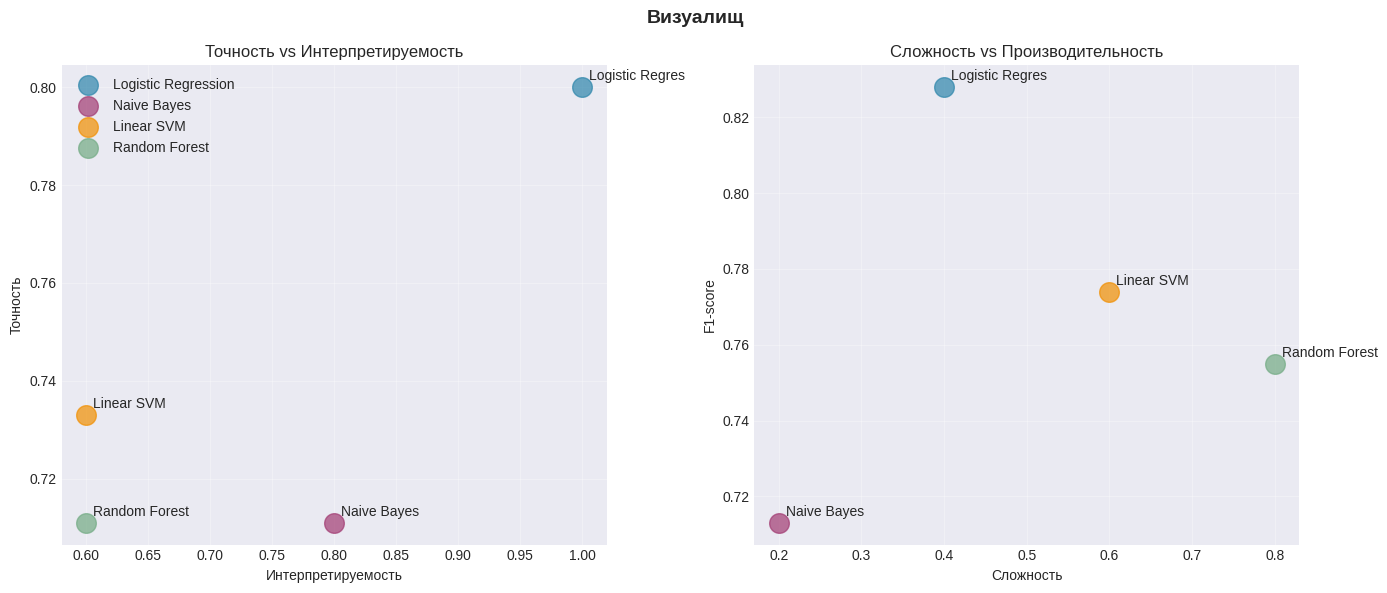

In [466]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Визуалищ', fontsize=14, fontweight='bold')


interpretability_map = {'Очень высокая': 1.0, 'Высокая': 0.8, 'Средняя': 0.6, 'Низкая': 0.4}
complexity_map = {'Очень низкая': 0.2, 'Низкая': 0.4, 'Средняя': 0.6, 'Высокая': 0.8}
colors = ['#2E86AB', '#A23B72', '#F18F01', '#73AB84']

for i, model_name in enumerate(models.keys()):
    model_data = tradeoffs_df[tradeoffs_df['Модель'] == model_name].iloc[0]
    acc = float(model_data['Точность'])
    interp = interpretability_map[model_data['Интерпретируемость']]

    axes[0].scatter(interp, acc, s=200, color=colors[i], alpha=0.7, label=model_name)
    axes[0].annotate(model_name[:15], (interp, acc), xytext=(5, 5), textcoords='offset points')

axes[0].set_xlabel('Интерпретируемость')
axes[0].set_ylabel('Точность')
axes[0].set_title('Точность vs Интерпретируемость')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

for i, model_name in enumerate(models.keys()):
    model_data = tradeoffs_df[tradeoffs_df['Модель'] == model_name].iloc[0]
    f1 = float(model_data['F1-score'])
    comp = complexity_map[model_data['Сложность']]

    axes[1].scatter(comp, f1, s=200, color=colors[i], alpha=0.7)
    axes[1].annotate(model_name[:15], (comp, f1), xytext=(5, 5), textcoords='offset points')

axes[1].set_xlabel('Сложность')
axes[1].set_ylabel('F1-score')
axes[1].set_title('Сложность vs Производительность')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_tradeoffs_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

### Task 9
**Conclusions & Reflection**

Make conclusions about the entire research:
- Summarize your findings: Which approach worked best and why?
- Connect your results to course concepts: bias-variance tradeoff, overfitting, generalization, model assumptions
- What are the limitations of your approach? What assumptions did you make?
- What would you do differently if you had more time or data?
- Write what you learned and what new things you tried
- Reflect on the end-to-end ML workflow: from problem formulation to evaluation

### Задание 9
**Выводы и размышление**

Сделайте выводы обо всем исследовании в целом:
- Обобщите свои выводы: какой подход сработал лучше всего и почему?
- Сопоставьте свои результаты с концепциями курса: компромисс между предвзятостью и дисперсией, переоснащение, обобщение, допущения модели
- Каковы ограничения вашего подхода? Какие предположения вы сделали?
- Что бы вы сделали по-другому, если бы у вас было больше времени или данных?
- Напишите, чему вы научились и что нового попробовали
- Поразмышляйте о сквозном рабочем процессе ML: от формулировки проблемы до оценки

**Общие выводы:** Лучше всего сработала логистическая регрессия, достигнув точности 0.800 благодаря оптимальному балансу между смещением и дисперсией, хорошей интерпретируемости и устойчивости к переобучению на доминирующем классе PER (64% выборки). SVM показал схожие результаты, но с меньшей интерпретируемостью, а Random Forest переобучился на частом классе, демонстрируя классическую проблему high-variance на несбалансированных данных.

**Сопоставление с концепцией курса:** Исследование наглядно продемонстрировало bias-variance tradeoff: простые модели (Logistic Regression) обеспечили лучшее обобщение, в то время как сложные (Random Forest) показали переобучение. Модели корректно работали в рамках своих допущений: линейные - линейной разделимости, NB - независимости признаков, что подтвердилось разной эффективностью на различных типах сущностей.

**Огрничения и предпложения:** Основные ограничения - дисбаланс классов (PER доминирует) и использование только поверхностных признаков без контекстной и семантической информации. Предполагалась независимость сущностей и стационарность данных, хотя в реальности контекст критически важен для NER.

**Улучшения:** Сбалансировать бы классы через oversampling/undersampling, добавить бы контекстные признаки (окружающие слова), использовала бы word embeddings (BERT, FastText), применила бы ансамблирование моделей и кросс-валидацию с учетом временных зависимостей для новостных данных.

**Обучение и новый опыт:** Освоила полный пайплайн ML для NLP: от предобработки текста (И ПОИСКА ДАТАСЕТА) до интерпретации моделей и анализа ошибок. Впервые применила системный анализ важности признаков для разных классов сущностей, что показало принципиально разные паттерны для LOC (заглавные названия) и PER (фамилии).

**Размышления:** Большой процент успеха определяется этапами формулировки проблемы и особенно подготовки данных.
Выявленная систематическая ошибка PER -> LOC на всех моделях указывает на фундаментальную проблему в данных, а не в алгоритмах.

Я dead inside